# Import Libraries :

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = FutureWarning)

# Install scikit-learn Library:

In [ ]:
!pip install scikit-learn

In [75]:
import sklearn
print(sklearn.__version__)

1.6.1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Data Into DataFrames:

In [2]:
HR_Emp = pd.read_csv("Employee.csv")
HR_Perf= pd.read_csv("PerformanceRating.csv")
HR_Edu = pd.read_csv("EducationLevel.csv")
HR_Sat = pd.read_csv("SatisfiedLevel.csv")
HR_Rat = pd.read_csv("RatingLevel.csv")

# Data Preparetion For Employee Table:

# Check the rows of Employee Table:
1470 Rows , 23 Columns

In [12]:
HR_Emp.shape

(1470, 23)

In [16]:
HR_Emp['EmployeeID'].unique()

array(['3012-1A41', 'CBCB-9C9D', '95D7-1CE9', ..., 'EBF4-5928',
       '60E6-B1D9', '84D4-D4C3'], shape=(1470,), dtype=object)

In [37]:
HR_Emp.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#Get data types:
HR_Emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [39]:
#Get summary statistics for numerical columns:
HR_Emp.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


# Ensure numerical columns have correct types

In [42]:
HR_Emp['Age'].dtypes

dtype('int64')

In [45]:
HR_Emp['DistanceFromHome (KM)'].dtypes

dtype('int64')

In [46]:
HR_Emp['Salary'].dtypes

dtype('int64')

In [47]:
HR_Emp['StockOptionLevel'].dtypes

dtype('int64')

In [48]:
HR_Emp['YearsAtCompany'].dtypes

dtype('int64')

In [49]:
HR_Emp['YearsInMostRecentRole'].dtypes

dtype('int64')

In [50]:
HR_Emp['YearsSinceLastPromotion'].dtypes

dtype('int64')

In [51]:
HR_Emp['YearsWithCurrManager'].dtypes

dtype('int64')

# Data Cleaning & Transformation

# Check For Duplicates (No Duplicates)

In [52]:
HR_Emp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

# Check For Nulls In Employee Table (No Null Values) 

In [40]:
HR_Emp.isnull()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
HR_Emp.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Handle Null Values(Assumption):

In [ ]:
# Fill missing values in numerical columns with the mean value
HR_Emp['Age'].fillna(HR_Emp['Age'].mean()) 
HR_Emp['DistanceFromHome(KM)'].fillna(HR_Emp['DistanceFromHome(KM)'].mean())
HR_Emp['Salary'].fillna(HR_Emp['Salary'].mean())
HR_Emp['StockOptionLevel'].fillna(HR_Emp['StockOptionLevel'].mean())
HR_Emp['YearsAtCompany'].fillna(HR_Emp['YearsAtCompany'].mean())
HR_Emp['YearsInMostRecentRole'].fillna(HR_Emp['YearsInMostRecentRole'].mean())
HR_Emp['YearsSinceLastPromotion'].fillna(HR_Emp['YearsSinceLastPromotion'].mean())
HR_Emp['YearsWithCurrManager'].fillna(HR_Emp['YearsWithCurrManager'].mean())

In [ ]:
# Fill missing values in categorical columns with the mode value
HR_Emp['FirstName'].ffill()
HR_Emp['LastName'].ffill()
HR_Emp['Education'].bfill()
HR_Emp['EducationField'].bfill()
HR_Emp['HireDate'].bfill()
HR_Emp['Gender'].fillna(HR_Emp['Gender'].mode()[0])
HR_Emp['BusinessTravel'].fillna(HR_Emp['BusinessTravel'].mode()[0])
HR_Emp['Department'].fillna(HR_Emp['Department'].mode()[0])
HR_Emp['State'].fillna(HR_Emp['State'].mode()[0])
HR_Emp['Ethnicity'].fillna(HR_Emp['Ethnicity'].mode()[0])
HR_Emp['JobRole'].fillna(HR_Emp['JobRole'].mode()[0])
HR_Emp['MaritalStatus'].fillna(HR_Emp['MaritalStatus'].mode()[0])
HR_Emp['OverTime'].fillna(HR_Emp['OverTime'].mode()[0])
HR_Emp['Attrition'].fillna(HR_Emp['Attrition'].mode()[0])


In [ ]:
#OR Dropping Missing Values :
HR_Emp.dropna()

In [64]:
HR_Emp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [65]:
HR_Emp.duplicated().sum()

np.int64(0)

In [54]:
HR_Emp.drop_duplicates(inplace=True)

# Correct Data Types

In [3]:
#Change HireDate column to Time Data Type:
HR_Emp['HireDate']=pd.to_datetime(HR_Emp['HireDate'])

In [4]:
#Remove Space Frome Marketing Value:
HR_Emp.rename(columns={'DistanceFromHome (KM)': 'DistanceFromHome(KM)'}, inplace=True)

HR_Emp['EducationField'] = HR_Emp['EducationField'].replace('Marketing ', 'Marketing')
HR_Emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Handling Gender Values

In [5]:
HR_Emp['Gender'] = HR_Emp['Gender'].replace(['Non-Binary', 'Prefer Not To Say'], 'OTher')
HR_Emp[['Gender']]

,Gender
0,Female
1,Male
2,Male
3,OTher
4,Female
...,...
1465,Male
1466,OTher
1467,Male
1468,Male


# Apply Accuracy Of Data:
There Is Emplyoee with jobRole Executive but in Technology Department instead of Sales Department

In [6]:
# Show JobRoles (SalesExcutive) Under Department (Technology) >>>>>>>>>>>>>>>>>>>>>>>>>>>>>
JobRoleByDept = HR_Emp[(HR_Emp['Department'] == 'Technology') & (HR_Emp['JobRole'] == 'Sales Executive')]
JobRoleByDept

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
1187,9758-DE2F,Modestine,Yeowell,Female,28,Some Travel,Technology,15,CA,White,...,Single,319619,0,Yes,2021-01-26,No,1,1,1,0


# Correct inconsistet JobRole 'Sales Executive' from 'Technology' to 'Sales' department


In [7]:
HR_Emp.loc[(HR_Emp['Department'] == 'Technology') & (HR_Emp['JobRole'] == 'Sales Executive'), 'Department'] = 'Sales'

In [8]:
HR_Emp.loc[(HR_Emp['Department'] == 'Technology') & (HR_Emp['JobRole'] == 'Sales Executive')]

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager


# Handling State Values

In [9]:
HR_Emp['State'] = HR_Emp['State'].replace('NY' , 'New York')
HR_Emp['State'] = HR_Emp['State'].replace('CA' , 'California')
HR_Emp['State'] = HR_Emp['State'].replace('IL' , 'Illinois')
HR_Emp[['State']].head(20)

,State
0,Illinois
1,California
2,California
3,Illinois
4,California
5,New York
6,New York
7,California
8,Illinois
9,New York


In [8]:
HR_Emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,Illinois,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,California,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,California,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,OTher,39,Some Travel,Technology,12,Illinois,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,California,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Delete Rows With Ages Smaler than 18 And Greater Than 60

In [9]:
HR_Emp[(HR_Emp['Age']>=18) & (HR_Emp['Age']<=60)]

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,Illinois,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,California,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,California,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,OTher,39,Some Travel,Technology,12,Illinois,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,California,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,California,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,OTher,27,Some Travel,Technology,8,California,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,California,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,California,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


# Ctegorizing Age Into Ranges:

In [10]:
# Function to categorize the Age into ranges
def Age_Range(age):
    if 18 <= age <=30:
        return '18 - 30'
    elif 30 < age <= 40:
        return '31 - 40'
    elif 40 < age <= 50:
        return '41 - 50'
    else:
        return 'Above 50'

# Apply the function to create the AgeRange column
HR_Emp['AgeRange'] = HR_Emp['Age'].apply(Age_Range)
HR_Emp['AgeRange']

0       18 - 30
1       31 - 40
2       41 - 50
3       31 - 40
4       18 - 30
         ...   
1465    18 - 30
1466    18 - 30
1467    18 - 30
1468    18 - 30
1469    18 - 30
Name: AgeRange, Length: 1470, dtype: object

# Categorizing Salary Into Levels:

In [11]:
# Function to categorize the Salary into Levels
def Salary_Levels(Salary):
    if Salary <= 50000:
        return 'Very Low'
    elif 50000 < Salary <= 100000:
        return 'Low'
    elif 100000 < Salary <= 200000:
        return 'Medium'
    elif 200000 < Salary <= 300000:
        return 'High'
    else:
        return 'Very High'

# Apply the function to create the SalaryLevels column
HR_Emp['SalaryLevels'] = HR_Emp['Salary'].apply(Salary_Levels)
HR_Emp[['SalaryLevels']]

,SalaryLevels
0,Medium
1,Medium
2,Very High
3,High
4,Very Low
...,...
1465,Very Low
1466,Low
1467,Low
1468,Very Low


# Categorizing Distance Into Ranges:

In [12]:
# Function to categorize the Age into ranges
def distance_range(Distance):
    if 1 <= Distance <= 10:
        return '1-10 km'
    elif 10 < Distance <= 20:
        return '11-20 km'
    elif 20 < Distance <= 30:
        return '21-30 km'
    elif 30 < Distance <=40:
        return '31-40 km'
    else:
        return 'Above 40 km'

# Apply the function to create the DistanceRange column
HR_Emp['DistanceRange'] = HR_Emp['DistanceFromHome(KM)'].apply(distance_range)
HR_Emp[['DistanceRange']]

,DistanceRange
0,21-30 km
1,21-30 km
2,21-30 km
3,11-20 km
4,21-30 km
...,...
1465,21-30 km
1466,1-10 km
1467,1-10 km
1468,1-10 km


# Add CurrentDate column to Retrieve Current/LastDate from table Employee

In [16]:
HR_Emp['Attrition/CurrentDate'] = HR_Emp['HireDate'] + pd.to_timedelta(HR_Emp['YearsAtCompany'] * 365, unit='D')

In [42]:
HR_Emp['Attrition/CurrentDate'] = pd.to_datetime(HR_Emp['Attrition/CurrentDate'])
HR_Emp['Attrition/CurrentDate']

0      2021-12-31
1      2022-01-01
2      2022-01-01
3      2022-01-02
4      2018-01-03
          ...    
1465   2022-12-26
1466   2022-12-30
1467   2022-12-30
1468   2022-12-30
1469   2022-12-31
Name: Attrition/CurrentDate, Length: 1470, dtype: datetime64[ns]

# Data Preparation For PerformanceRating Table:

# Check #rows of PerformanceRating Table:
6709 Rows

In [17]:
HR_Perf.shape

(6709, 11)

In [35]:
HR_Perf.nunique()

PerformanceID                      6709
EmployeeID                         1280
ReviewDate                         2771
EnvironmentSatisfaction               5
JobSatisfaction                       5
RelationshipSatisfaction              5
TrainingOpportunitiesWithinYear       3
TrainingOpportunitiesTaken            4
WorkLifeBalance                       5
SelfRating                            3
ManagerRating                         4
dtype: int64

In [17]:
HR_Perf.columns

Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating'],
      dtype='object')

# Identify Number of Rated EmployeeID in PerformanceRating Table (1280 Employees)

In [21]:
HR_Perf['EmployeeID'].unique()

array(['79F7-78EC', 'B61E-0F26', 'F5E3-48BB', ..., 'AAD7-8DDC',
       'A2AE-FD61', 'D6BA-10A1'], shape=(1280,), dtype=object)

# Identifying Number of NotRated Employee (190 Employees)

In [41]:
NonRated_Emp = HR_Emp[~HR_Emp['EmployeeID'].isin(HR_Perf['EmployeeID'])]
NonRated_Emp.shape

(190, 23)

In [20]:
#Get data types:
HR_Perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


# Ensure numerical columns have correct types

In [24]:
HR_Perf['EnvironmentSatisfaction'].dtypes

dtype('int64')

In [25]:
HR_Perf['JobSatisfaction'].dtypes

dtype('int64')

In [26]:
HR_Perf['RelationshipSatisfaction'].dtypes

dtype('int64')

In [27]:
HR_Perf['TrainingOpportunitiesWithinYear'].dtypes

dtype('int64')

In [28]:
HR_Perf['TrainingOpportunitiesTaken'].dtypes

dtype('int64')

In [29]:
HR_Perf['WorkLifeBalance'].dtypes

dtype('int64')

In [30]:
HR_Perf['SelfRating'].dtypes

dtype('int64')

In [31]:
HR_Perf['ManagerRating'].dtypes

dtype('int64')

In [21]:
#Get summary statistics for numerical columns:
HR_Perf.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


# Data Cleaning :

# Check For Null values in PerformaneRating Table (No Null Values) 

In [22]:
HR_Perf.isnull()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6704,False,False,False,False,False,False,False,False,False,False,False
6705,False,False,False,False,False,False,False,False,False,False,False
6706,False,False,False,False,False,False,False,False,False,False,False
6707,False,False,False,False,False,False,False,False,False,False,False


In [23]:
HR_Perf.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

# Handle Null Values(Assumption):

In [ ]:
# Fill missing values in categorical columns with the mode value
HR_Perf['EmployeeID'].ffill()
HR_Perf['ReviewDate'].fillna(HR_Perf['ReviewDate'].mode()[0])

In [ ]:
# Fill missing values in numerical columns with the mean value
HR_Perf['EnvironmentSatisfaction'].fillna(HR_Perf['EnvironmentSatisfaction'].mean()) 
HR_Perf['JobSatisfaction'].fillna(HR_Perf['JobSatisfaction'].mean())
HR_Perf['RelationshipSatisfaction'].fillna(HR_Perf['RelationshipSatisfaction'].mean())
HR_Perf['TrainingOpportunitiesWithinYear'].fillna(HR_Perf['TrainingOpportunitiesWithinYear'].mean())
HR_Perf['TrainingOpportunitiesTaken'].fillna(HR_Perf['TrainingOpportunitiesTaken'].mean())
HR_Perf['WorkLifeBalance'].fillna(HR_Perf['WorkLifeBalance'].mean())
HR_Perf['SelfRating'].fillna(HR_Perf['SelfRating'].mean())
HR_Perf['ManagerRating'].fillna(HR_Perf['ManagerRating'].mean())

In [ ]:
#OR Dropping Missing Values :
HR_Perf.dropna()

# Check For Duplicates (No Duplicates)

In [32]:
# Handle Duplicates: 
HR_Perf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6704    False
6705    False
6706    False
6707    False
6708    False
Length: 6709, dtype: bool

In [33]:
HR_Perf.duplicated().sum()

np.int64(0)

In [34]:
HR_Perf.drop_duplicates(inplace=True)

# Correct Data Types

In [18]:
#Change ReviewDate, HireDate column to Time Data Type:
HR_Perf['ReviewDate'] = pd.to_datetime(HR_Perf['ReviewDate'])

# Check Rows and columns for EducationLevel Table

In [45]:
HR_Edu

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


# Check Rows and columns for SatisfiedLevel Table

In [46]:
HR_Sat

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


# Check Rows and columns for RatingLevel Table

In [47]:
HR_Rat

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


# Build Data Model

In [19]:
# Merge Employee and Education table on EpolyeeID"
HR_Employee = pd.merge(HR_Emp, HR_Edu, left_on='Education',right_on='EducationLevelID' , how='inner')

In [20]:
# Merge Performance and Satisfaction table on SatisfactionID to get EnvironmentSatisfaction:
HR_Performance = pd.merge(HR_Perf,HR_Sat, left_on=['EnvironmentSatisfaction'],right_on=['SatisfactionID'], how='inner')

In [21]:
# Merge Performance and Satisfaction table on SatisfactionID to get JobSatisfaction :
HR_Performance = pd.merge(HR_Performance,HR_Sat, left_on=['JobSatisfaction'],right_on=['SatisfactionID'], how='inner')

In [22]:
# Merge Performance and Satisfaction table on SatisfactionID to get RelationshipSatisfaction:
HR_Performance = pd.merge(HR_Performance,HR_Sat, left_on=['RelationshipSatisfaction'],right_on=['SatisfactionID'], how='inner')

In [23]:
# Merge Performance and Satisfaction table on SatisfactionID to get WorkLifeBalance: 
HR_Performance = pd.merge(HR_Performance,HR_Sat, left_on=['WorkLifeBalance'],right_on=['SatisfactionID'],suffixes=['_z','_w'], how='inner')

In [24]:
# Merge Performance and Rating table on RatingID to get SelfRating :
HR_Performance= pd.merge(HR_Performance,HR_Rat, left_on=['SelfRating'],right_on=['RatingID'], how='inner')

In [25]:
# Merge Performance and Rating table on RatingID to get ManagerRating:
HR_Performance= pd.merge(HR_Performance,HR_Rat, left_on=['ManagerRating'],right_on=['RatingID'], how='inner')

# Modify Columns Names:

In [26]:
HR_Performance.rename(columns={'SatisfactionLevel_x': 'EnvironmentSatisfactionLevel'},inplace=True)

In [27]:
HR_Performance.rename(columns={'SatisfactionLevel_y': 'JobSatisfactionLevel'},inplace=True)

In [28]:
HR_Performance.rename(columns={'SatisfactionLevel_z': 'RelationshipSatisfactionLevel'},inplace=True)

In [29]:
HR_Performance.rename(columns={'SatisfactionLevel_w': 'WorkLifeBalanceLevel'},inplace=True)

In [30]:
HR_Performance.rename(columns={'RatingLevel_x': 'SelfRatingLevel'},inplace=True)

In [31]:
HR_Performance.rename(columns={'RatingLevel_y': 'ManagerRatingLevel'},inplace=True)

In [32]:
HR_Performance[['EnvironmentSatisfactionLevel','JobSatisfactionLevel','RelationshipSatisfactionLevel','WorkLifeBalanceLevel','SelfRatingLevel','ManagerRatingLevel']]

,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel
0,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Exceeds Expectation,Exceeds Expectation
1,Very Satisfied,Satisfied,Satisfied,Satisfied,Exceeds Expectation,Meets Expectation
2,Neutral,Satisfied,Very Satisfied,Neutral,Above and Beyond,Exceeds Expectation
3,Very Satisfied,Neutral,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement
4,Very Satisfied,Dissatisfied,Neutral,Satisfied,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...
6704,Very Satisfied,Neutral,Neutral,Very Satisfied,Above and Beyond,Exceeds Expectation
6705,Neutral,Very Satisfied,Satisfied,Neutral,Exceeds Expectation,Exceeds Expectation
6706,Neutral,Satisfied,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement
6707,Very Satisfied,Dissatisfied,Very Satisfied,Satisfied,Meets Expectation,Meets Expectation


In [33]:
# Merge Final Performance and final Emplyee table on EmployeeID
HR_Data = pd.merge(HR_Performance , HR_Employee , on='EmployeeID',how = 'inner')

In [34]:
HR_Data.shape

(6709, 51)

# Check New Columns are in New Merge 

In [35]:
HR_Data[['EnvironmentSatisfactionLevel', 'JobSatisfactionLevel', 'RelationshipSatisfactionLevel',
'WorkLifeBalanceLevel', 'SelfRatingLevel', 'ManagerRatingLevel']].head()

,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel
0,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Exceeds Expectation,Exceeds Expectation
1,Very Satisfied,Satisfied,Satisfied,Satisfied,Exceeds Expectation,Meets Expectation
2,Neutral,Satisfied,Very Satisfied,Neutral,Above and Beyond,Exceeds Expectation
3,Very Satisfied,Neutral,Dissatisfied,Dissatisfied,Meets Expectation,Needs Improvement
4,Very Satisfied,Dissatisfied,Neutral,Satisfied,Exceeds Expectation,Meets Expectation


# Calculate Date From HireDate And Convert DateType:

In [36]:
HR_Data.loc[:, 'CurrentDate'] = HR_Data['HireDate'] + pd.to_timedelta(HR_Data['YearsAtCompany'] * 365, unit='D')

In [37]:
HR_Data.loc[:, "CurrentDate"] = pd.to_datetime(HR_Data["CurrentDate"])

# Check If There are Inconsistent ReviewDate
# There are 1141 ReviewDate Before HireDate

In [33]:
#ReviewDate Before HireDate
HR_Before = HR_Data[HR_Data["ReviewDate"] < HR_Data["HireDate"]]
HR_Before[['ReviewDate','HireDate']]

,ReviewDate,HireDate
0,2013-01-02,2013-12-14
1,2013-01-03,2014-11-07
2,2013-01-03,2015-01-13
3,2013-01-04,2015-05-11
4,2013-01-04,2014-04-02
...,...,...
6695,2016-03-10,2022-11-06
6696,2016-03-11,2016-10-04
6697,2016-03-11,2020-11-08
6698,2013-04-07,2018-08-24


# ReviewDate After CurrentDate For Employee Who Left (677 Rows)

In [34]:
HR_After = HR_Data[((HR_Data["Attrition"] == "Yes") & (HR_Data["ReviewDate"] > HR_Data["CurrentDate"]))] # Attrition = Yes and ReviewDate > AttritionDate   
HR_After[['ReviewDate','CurrentDate']]

,ReviewDate,CurrentDate
13,2016-03-18,2015-04-07
23,2016-03-24,2014-08-19
27,2016-03-27,2015-02-04
44,2016-04-03,2014-08-09
45,2016-04-05,2014-06-10
...,...,...
6659,2016-02-27,2014-05-09
6680,2016-03-05,2014-03-21
6681,2016-03-05,2016-02-21
6684,2016-03-06,2015-04-27


# Remove rows which ReviewDate is After HireDate 


In [36]:
HR_Data = HR_Data[
    (HR_Data["ReviewDate"] >= HR_Data["HireDate"])  # Condition 1: ReviewDate after HireDate for all rows
]

# Filter rows which ReviewDate is Before LeaveDate For Those who Left :


In [38]:
HR_Data = HR_Data[
        (HR_Data["Attrition"] == "No") |       # Condition 2: All rows with Attrition = No
        ((HR_Data["Attrition"] == "Yes") & (HR_Data["ReviewDate"] <= HR_Data["Attrition/CurrentDate"]))  # Attrition = Yes and ReviewDate < DateFromHire   
]

# Data After Cleaning (4891 Rows)

In [39]:
HR_Data.shape

(4891, 51)

# Check If There are any non-valid ReviewDate (Before Hire)

In [40]:
HR_Data[HR_Data["ReviewDate"] < HR_Data["HireDate"]]

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,SalaryLevels,DistanceRange,Attrition/CurrentDate,EducationLevelID,EducationLevel


# Check If There are any non-valid ReviewDate (After Attrition)

In [41]:
HR_Data[((HR_Data["Attrition"] == "Yes") & (HR_Data["ReviewDate"] > HR_Data["Attrition/CurrentDate"]))]

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,SalaryLevels,DistanceRange,Attrition/CurrentDate,EducationLevelID,EducationLevel


# Check Review Date Validaty :

In [54]:
HR_Data[HR_Data['Attrition']=='Yes'][['HireDate','ReviewDate','CurrentDate']].head(10)

,HireDate,ReviewDate,CurrentDate
6,2012-05-02,2013-01-08,2017-05-01
11,2013-10-15,2016-03-16,2019-10-14
18,2012-04-26,2016-03-22,2021-04-24
19,2012-02-02,2016-03-23,2019-01-31
21,2012-04-23,2013-04-12,2013-04-23
34,2015-12-06,2016-03-30,2022-12-04
37,2014-06-20,2016-03-31,2021-06-18
48,2012-03-08,2016-04-06,2021-03-06
59,2013-08-26,2016-04-12,2018-08-25
61,2014-05-16,2016-04-13,2018-05-15


# Load Performance Data into New CSV Files :

In [48]:
HR_PerformanceRating = HR_Data[['PerformanceID', 'EmployeeID', 'ReviewDate', 'CurrentDate', 'EnvironmentSatisfaction', 'EnvironmentSatisfactionLevel' ,
'JobSatisfaction', 'JobSatisfactionLevel','RelationshipSatisfaction', 'RelationshipSatisfactionLevel' , 'WorkLifeBalance','WorkLifeBalanceLevel', 'SelfRating','SelfRatingLevel', 'ManagerRating', 'ManagerRatingLevel','TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken']]
HR_PerformanceRating.head()

,PerformanceID,EmployeeID,ReviewDate,CurrentDate,EnvironmentSatisfaction,EnvironmentSatisfactionLevel,JobSatisfaction,JobSatisfactionLevel,RelationshipSatisfaction,RelationshipSatisfactionLevel,WorkLifeBalance,WorkLifeBalanceLevel,SelfRating,SelfRatingLevel,ManagerRating,ManagerRatingLevel,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken
6,PR07,9E7A-1F70,2013-01-08,2017-05-01,3,Neutral,4,Satisfied,5,Very Satisfied,5,Very Satisfied,4,Exceeds Expectation,3,Meets Expectation,2,1
11,PR1000,528C-3E0D,2016-03-16,2019-10-14,4,Satisfied,4,Satisfied,2,Dissatisfied,4,Satisfied,5,Above and Beyond,5,Above and Beyond,2,2
12,PR1001,D077-169C,2016-03-17,2022-03-04,3,Neutral,5,Very Satisfied,3,Neutral,3,Neutral,5,Above and Beyond,5,Above and Beyond,2,2
16,PR1005,88B8-EB84,2016-03-19,2022-03-22,3,Neutral,4,Satisfied,2,Dissatisfied,4,Satisfied,5,Above and Beyond,5,Above and Beyond,3,1
17,PR1006,9C57-828C,2016-03-19,2022-07-09,5,Very Satisfied,4,Satisfied,2,Dissatisfied,2,Dissatisfied,3,Meets Expectation,3,Meets Expectation,1,1


# #Employee who Rated After Delete Inconsistent ReviewDate (1169 Employees)

In [49]:
HR_Data['EmployeeID'].unique()

array(['9E7A-1F70', '528C-3E0D', 'D077-169C', ..., 'EB8F-204D',
       '62A3-DEA7', 'FD0B-7B0A'], shape=(1169,), dtype=object)

# Employee who Not Rated After Delete Inconsistent ReviewDate (301 Employees)

In [50]:
Not_Rated_Employees = HR_Employee[~HR_Employee['EmployeeID'].isin(HR_Data['EmployeeID'])]
Not_Rated_Employees.shape

(301, 28)

In [55]:
Not_Rated_Employees[['YearsAtCompany']]

,YearsAtCompany
130,1
373,0
377,0
381,0
491,0
...,...
1465,0
1466,0
1467,0
1468,0


# Export Employee Table & Perfomance Table To CsV File

In [57]:
HR_Employee.columns = HR_Employee.columns.str.strip()
HR_Employee.to_csv("D:/Depi/Projects/Graduation Project/HR Tableau/Employee.csv", index=False)

In [58]:
HR_PerformanceRating.columns = HR_PerformanceRating.columns.str.strip()
HR_PerformanceRating.to_csv("D:/Depi/Projects/Graduation Project/HR Tableau/PerformanceRating.csv" , index=False)

# Load Cleaned Data Of Employee

In [59]:
New_Emp = pd.read_csv("D:/Depi/Projects/Graduation Project/HR Tableau/Employee.csv")
New_Emp

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome(KM),State,Ethnicity,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryLevels,AgeRange,DistanceRange,EducationLevelID,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,Illinois,White,...,No,10,4,9,7,Medium,18 - 30,21-30 km,5,Doctorate
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,California,White,...,No,10,6,10,0,Medium,31 - 40,21-30 km,4,Masters
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,California,Asian or Asian American,...,No,10,6,10,8,Very High,41 - 50,21-30 km,4,Masters
3,47A0-559B,Ermentrude,Berrie,OTher,39,Some Travel,Technology,12,Illinois,White,...,No,10,10,10,0,High,31 - 40,11-20 km,3,Bachelors
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,California,White,...,Yes,6,1,1,6,Very Low,18 - 30,21-30 km,2,High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,California,Black or African American,...,No,0,0,0,0,Very Low,18 - 30,21-30 km,2,High School
1466,6FB9-A624,Marc,Calver,OTher,27,Some Travel,Technology,8,California,Black or African American,...,No,0,0,0,0,Low,18 - 30,1-10 km,3,Bachelors
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,California,Black or African American,...,No,0,0,0,0,Low,18 - 30,1-10 km,4,Masters
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,California,Black or African American,...,No,0,0,0,0,Very Low,18 - 30,1-10 km,3,Bachelors


# Load Cleaned Data Of PerformanceRating:

In [54]:
New_Performane = pd.read_csv("D:/Depi/Projects/Graduation Project/HR Tableau/PerformanceRating.csv")
New_Performane

,PerformanceID,EmployeeID,ReviewDate,CurrentDate,EnvironmentSatisfaction,EnvironmentSatisfactionLevel,JobSatisfaction,JobSatisfactionLevel,RelationshipSatisfaction,RelationshipSatisfactionLevel,WorkLifeBalance,WorkLifeBalanceLevel,SelfRating,SelfRatingLevel,ManagerRating,ManagerRatingLevel,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken
0,PR07,9E7A-1F70,2013-01-08,2017-05-01,3,Neutral,4,Satisfied,5,Very Satisfied,5,Very Satisfied,4,Exceeds Expectation,3,Meets Expectation,2,1
1,PR1000,528C-3E0D,2016-03-16,2019-10-14,4,Satisfied,4,Satisfied,2,Dissatisfied,4,Satisfied,5,Above and Beyond,5,Above and Beyond,2,2
2,PR1001,D077-169C,2016-03-17,2022-03-04,3,Neutral,5,Very Satisfied,3,Neutral,3,Neutral,5,Above and Beyond,5,Above and Beyond,2,2
3,PR1005,88B8-EB84,2016-03-19,2022-03-22,3,Neutral,4,Satisfied,2,Dissatisfied,4,Satisfied,5,Above and Beyond,5,Above and Beyond,3,1
4,PR1006,9C57-828C,2016-03-19,2022-07-09,5,Very Satisfied,4,Satisfied,2,Dissatisfied,2,Dissatisfied,3,Meets Expectation,3,Meets Expectation,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,PR993,56A5-271B,2016-03-13,2022-10-08,4,Satisfied,2,Dissatisfied,2,Dissatisfied,4,Satisfied,4,Exceeds Expectation,3,Meets Expectation,1,1
4887,PR994,B3FE-D332,2016-03-13,2022-03-13,4,Satisfied,4,Satisfied,3,Neutral,3,Neutral,4,Exceeds Expectation,3,Meets Expectation,1,1
4888,PR996,7C80-94E0,2016-03-14,2021-12-30,3,Neutral,5,Very Satisfied,4,Satisfied,3,Neutral,4,Exceeds Expectation,4,Exceeds Expectation,2,1
4889,PR997,8233-2483,2016-03-14,2022-03-10,3,Neutral,4,Satisfied,2,Dissatisfied,2,Dissatisfied,3,Meets Expectation,2,Needs Improvement,3,1


In [ ]:
print(df.columns.tolist())


# HR Analysis Questions:

# Overview Dashboard

# Total  Employees (1470)

In [38]:
Total_Employees = HR_Employee.shape[0]
Total_Employees

1470

# Attrition Count (237)


In [39]:
Attrition_count = HR_Employee[HR_Employee['Attrition'] == 'Yes'].shape[0]
Attrition_count

237

# Active_Employee (1233)


In [40]:
Active_Employee = HR_Emp[HR_Emp['Attrition'] == 'No'].shape[0]
Active_Employee

1233

# Attrition Rate (16%)


In [41]:
Attrition_Rate = round((Attrition_count / Total_Employees) * 100)
Attrition_Rate
print(f"{Attrition_Rate}%")

16%


# Attrition Rate Pie Chart:

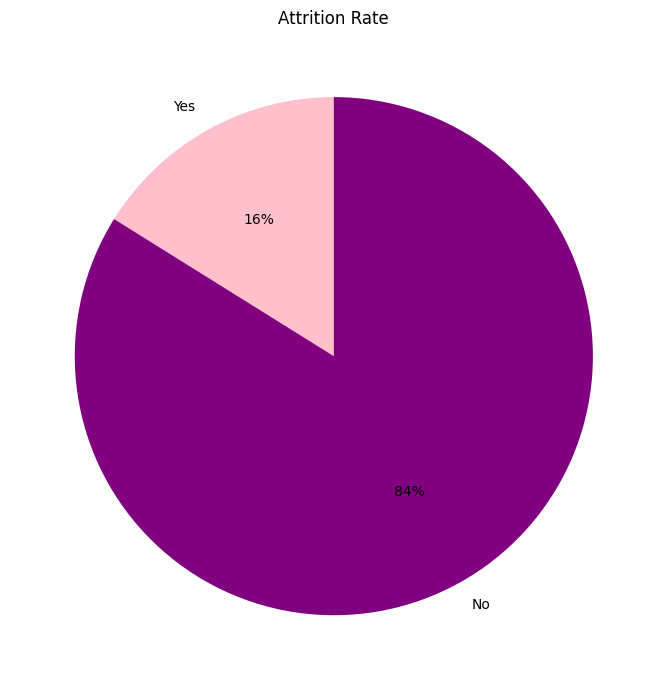

In [43]:
Stayed_Employees = Total_Employees - Attrition_count  # Employees who stayed
labels = ['Yes','No']
sizes = [Attrition_count, Stayed_Employees]
colors = ["pink", "purple"]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)

# Add a title
plt.title('Attrition Rate')

# Show the plot
plt.tight_layout()
plt.show()

# Average Age (29)

In [60]:
Average_Age = round(HR_Employee['Age'].mean())
Average_Age

29

# Average YearsAtCompany For Employees

In [13]:
Average_Years = round(HR_Employee['YearsAtCompany'].mean())
Average_Years

5

# Average Salary (113 k)

In [51]:
Average_Salary = HR_Employee['Salary'].mean()
Rounded_Salary = round(Average_Salary / 1000) 
print(f"{Rounded_Salary} K")

113 K


# OverTime Count(416)

In [44]:
OverTime_count = HR_Employee[HR_Employee['OverTime'] == 'Yes'].shape[0]
OverTime_count

416

# OverTime Rate (28%)

In [45]:
OverTime_Rate = round((OverTime_count / Total_Employees) * 100)
OverTime_Rate
print(f"{OverTime_Rate}%")

28%


# Pie Chart with OverTime :

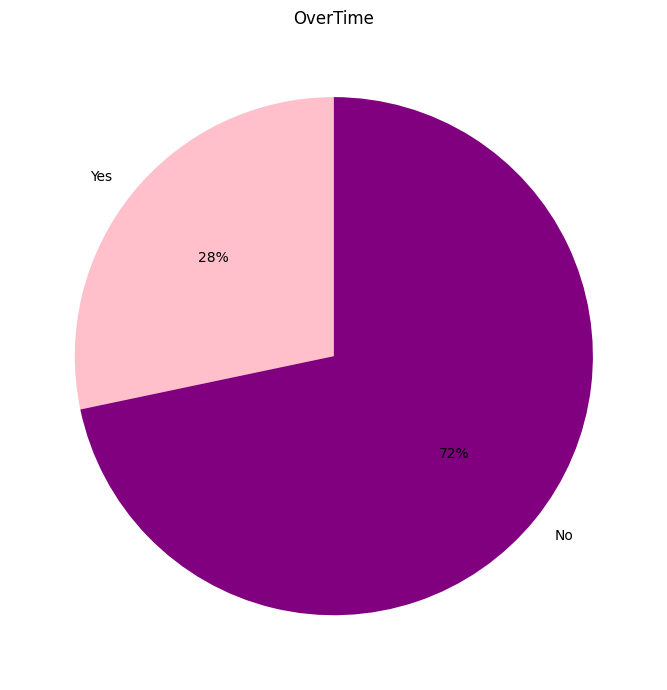

In [46]:
No_Over_Employees = Total_Employees - OverTime_count  # Employees who stayed
labels = ['Yes','No']
sizes = [OverTime_count, No_Over_Employees]
colors = ["pink", "purple"]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors)

# Add a title
plt.title('OverTime')

# Show the plot
plt.tight_layout()
plt.show()

# Employees By Gender:

In [70]:
GenderCount = HR_Employee.groupby('Gender')['EmployeeID'].count()
GenderCount 

Gender
Female    675
Male      651
OTher     144
Name: EmployeeID, dtype: int64

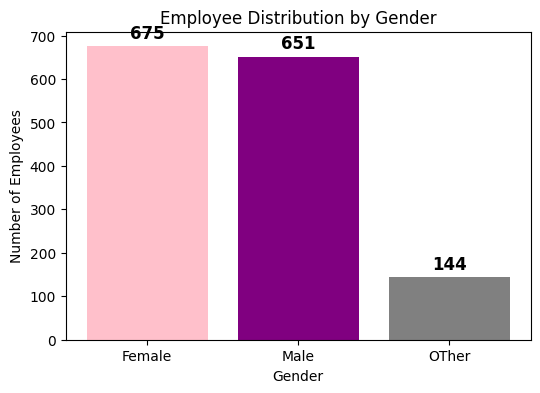

In [72]:
plt.figure(figsize=(6,4))
bars = plt.bar(GenderCount.index, GenderCount, color=['pink', 'purple', 'gray'])

# Add labels directly to bars (no loop!)
plt.bar_label(bars, labels=GenderCount .values, padding=3, fontsize=12, fontweight='bold')

# Add axes and title
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Gender")

# Show the chart
plt.show()

# Bar Chart of Gender Distribution:

# Employees By AgeRange:

In [73]:
AgeCount = HR_Employee.groupby('AgeRange')['EmployeeID'].count()
AgeCount 

AgeRange
18 - 30     999
31 - 40     278
41 - 50     192
Above 50      1
Name: EmployeeID, dtype: int64

# Gender Distribution (Most Employees in Range 18-30)

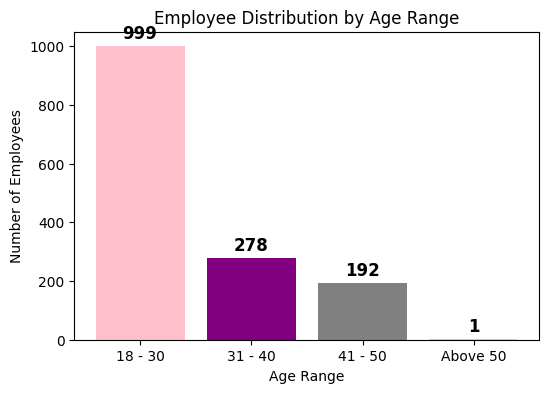

In [74]:
# Calculate the count distribution
age_counts = HR_Employee['AgeRange'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(age_counts.index, age_counts, color=['pink', 'purple', 'gray'])

# Add labels directly to bars (no loop!)
plt.bar_label(bars, labels=age_counts.values, padding=3, fontsize=12, fontweight='bold')

# Add axes and title
plt.xlabel("Age Range")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Age Range")

# Show the chart
plt.show()


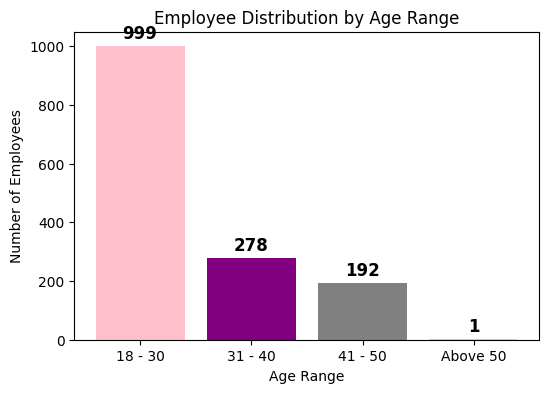

In [8]:
# Calculate the count distribution
age_counts = HR_Employee['AgeRange'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(age_counts.index, age_counts, color=['pink', 'purple', 'gray'])

# Add labels directly to bars (no loop!)
plt.bar_label(bars, labels=age_counts.values, padding=3, fontsize=12, fontweight='bold')

# Add axes and title
plt.xlabel("Age Range")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Age Range")

# Show the chart
plt.show()


# Employee DashBoard:

In [65]:
#Employee Per jobRole
Emp_JobRole = HR_Employee['JobRole'].value_counts().sort_values(ascending=True)
Emp_JobRole

JobRole
HR Manager                     4
HR Business Partner            7
Recruiter                     24
HR Executive                  28
Manager                       37
Analytics Manager             52
Engineering Manager           75
Sales Representative          83
Senior Software Engineer     132
Machine Learning Engineer    146
Data Scientist               261
Software Engineer            294
Sales Executive              327
Name: count, dtype: int64

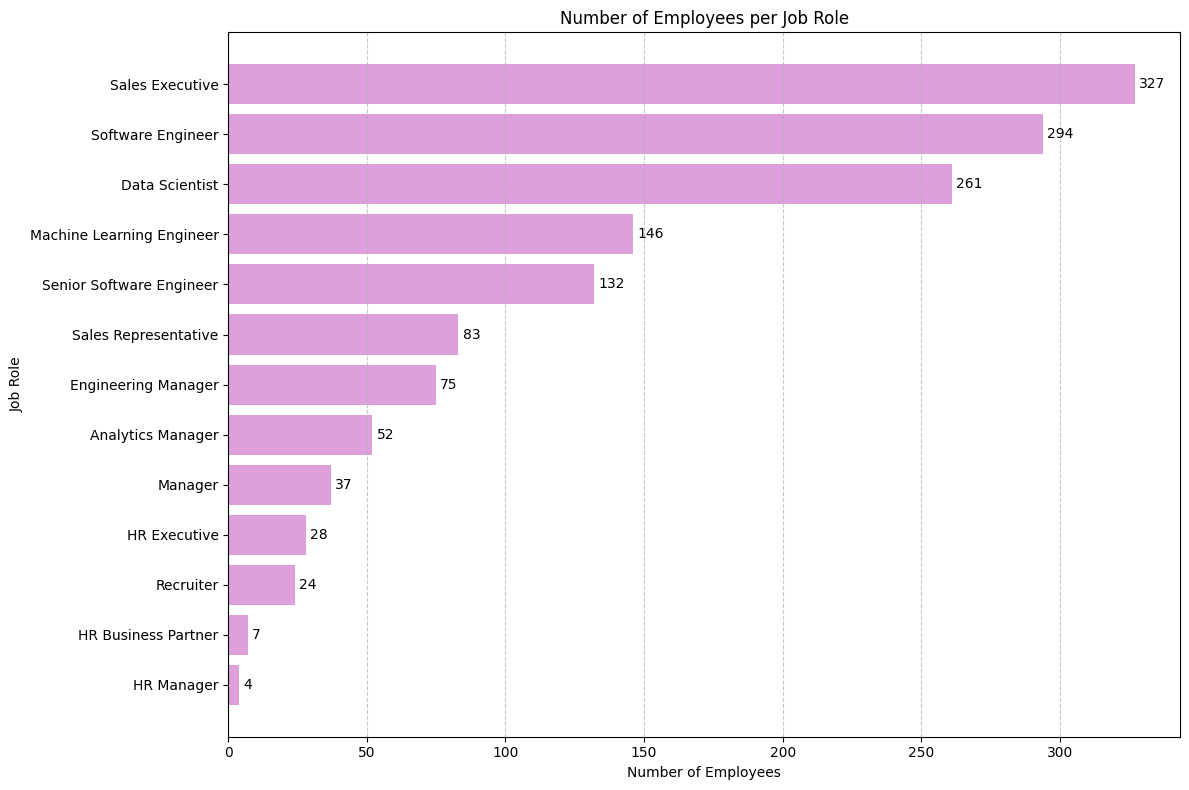

In [66]:

# Step 2: Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(Emp_JobRole.index, Emp_JobRole.values, color='plum')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.title('Number of Employees per Job Role')

# Step 3: Add data labels (no loop!)
plt.bar_label(bars, labels=Emp_JobRole.values, padding=3)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# #Employee Per Department

In [67]:
Emp_Department = HR_Employee['Department'].value_counts().sort_values(ascending=True)
Emp_Department

Department
Human Resources     63
Sales              447
Technology         960
Name: count, dtype: int64

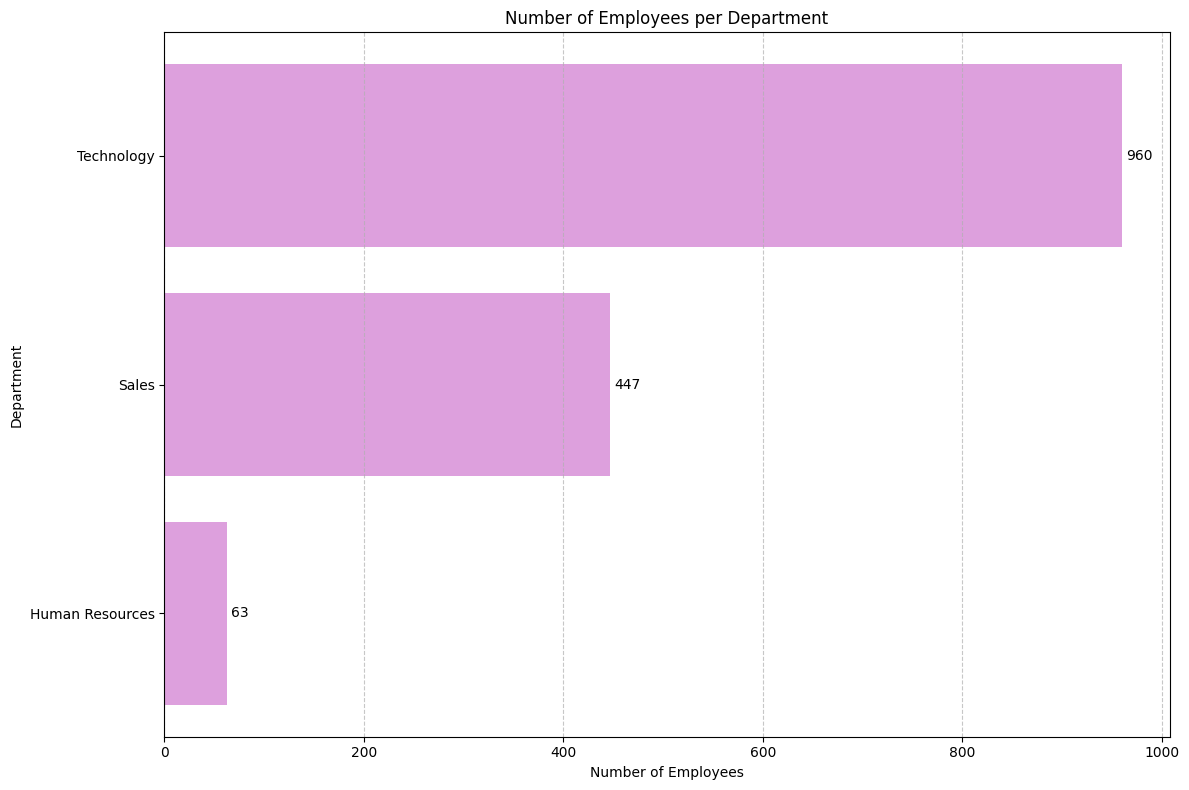

In [68]:
# Step 2: Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(Emp_Department.index, Emp_Department.values, color='plum')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.title('Number of Employees per Department')

# Step 3: Add data labels (no loop!)
plt.bar_label(bars, labels=Emp_Department.values, padding=3)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Employee Per EducationLevel

In [71]:
Emp_level = HR_Employee.groupby('EducationLevel')['EmployeeID'].count()
Emp_level

EducationLevel
Bachelors                   572
Doctorate                    48
High School                 282
Masters                     398
No Formal Qualifications    170
Name: EmployeeID, dtype: int64

In [72]:
#Employee Per EducationField
Emp_Field = HR_Employee.groupby('EducationField')['EmployeeID'].count()
Emp_Field

EducationField
Business Studies        94
Computer Science       440
Economics              101
Human Resources         27
Information Systems    363
Marketing              325
Other                   82
Technical Degree        38
Name: EmployeeID, dtype: int64

In [73]:
#Employee Per MaritalStatus
Emp_Marital = HR_Employee.groupby('MaritalStatus')['EmployeeID'].count()
Emp_Marital

MaritalStatus
Divorced    297
Married     624
Single      549
Name: EmployeeID, dtype: int64

In [63]:
#Employee Per BusinessTravel
Emp_BusinessTravel = HR_Employee.groupby('BusinessTravel')['EmployeeID'].count()
Emp_BusinessTravel

BusinessTravel
Frequent Traveller     277
No Travel              150
Some Travel           1043
Name: EmployeeID, dtype: int64

In [74]:
#Employee Per State
Emp_State = HR_Employee.groupby('State')['EmployeeID'].count()
Emp_State

SalaryLevels

State
California    875
Illinois      176
New York      419
Name: EmployeeID, dtype: int64

In [77]:
#Employee Per SalaryLevels
Emp_Salary = HR_Emp.groupby('SalaryLevels')['EmployeeID'].count()
Emp_Salary

SalaryLevels
High         137
Low          466
Medium       281
Very High    113
Very Low     473
Name: EmployeeID, dtype: int64

# Employees will be promoted Due To High Performance And LastPromotion
Average Rating is Greater Than 4.0 and YearsSinceLastPromotion > 4 Years

In [112]:
# Aggregate data per EmployeeID
agg_data = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "YearsSinceLastPromotion": "min",  # Minimum years since last promotion
    "JobRole": "first"  # Keep JobRole for grouping
})

# Apply the filtering conditions
filtered_data = agg_data[(agg_data["ManagerRating"] > 4.0) & (agg_data["YearsSinceLastPromotion"] > 4)]

# Create a Pivot Table to count employees per JobRole
Promoted_Employee = pd.pivot_table(
    filtered_data, 
    values="EmployeeID",  # Counting Employee IDs
    index="JobRole",      # Group by Job Role
    aggfunc="count"       # Count number of employees
)

# Display the Pivot Table
Promoted_Employee


,EmployeeID
JobRole,
Analytics Manager,1
Data Scientist,7
Engineering Manager,2
Machine Learning Engineer,3
Recruiter,3
Sales Executive,9
Sales Representative,1
Senior Software Engineer,3
Software Engineer,6


# Employees will be Retrenched Due To Low Performance :
Average Rating is 2.0

In [56]:
# Aggregate data per EmployeeID
agg_data2 = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "JobRole": "first"  # Keep JobRole for grouping
})

# Apply the filtering conditions
filtered_data2 = agg_data2[(agg_data2["ManagerRating"] == 2.0)]

# Create a Pivot Table to count employees per JobRole
Retrenched_Employee = pd.pivot_table(
    filtered_data2, 
    values="EmployeeID",  # Counting Employee IDs
    index="JobRole",      # Group by Job Role
    aggfunc="count"       # Count number of employees
)

# Display the Pivot Table
Retrenched_Employee


,EmployeeID
JobRole,
Analytics Manager,3
Data Scientist,4
Engineering Manager,2
HR Executive,1
Machine Learning Engineer,3
Manager,1
Sales Executive,11
Sales Representative,2
Senior Software Engineer,6


In [113]:
# Aggregate data per EmployeeID
agg_data2 = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "YearsInMostRecentRole": "min",  # Minimum years since last promotion
    "JobRole": "first"  # Keep JobRole for grouping
})

# Apply the filtering conditions
filtered_data2 = agg_data2[(agg_data2["ManagerRating"] < 3.5) & (agg_data2["YearsInMostRecentRole"] > 5)]

# Create a Pivot Table to count employees per JobRole
Retrenched_Employee = pd.pivot_table(
    filtered_data2, 
    values="EmployeeID",  # Counting Employee IDs
    index="JobRole",      # Group by Job Role
    aggfunc="count"       # Count number of employees
)

# Display the Pivot Table
Retrenched_Employee


,EmployeeID
JobRole,
Analytics Manager,3
Data Scientist,20
Engineering Manager,3
HR Business Partner,1
HR Manager,1
Machine Learning Engineer,6
Manager,1
Recruiter,2
Sales Executive,23


# Employee Will Be Retired Based ON Their Age (65 Years)
First one Will Be in 2037

In [115]:

# Calculate Retirement Year
HR_Employee["Retirement Year"] = 2023 + (65 - HR_Employee["Age"])

# Count number of employees retiring each year
retirement_counts = HR_Employee["Retirement Year"].value_counts().reset_index()
retirement_counts.columns = ["Year", "Employee Count"]
retirement_counts = retirement_counts.sort_values("Year")
retirement_counts


,Year,Employee Count
33,2037,1
31,2038,6
32,2039,4
27,2040,22
24,2041,23
30,2042,15
29,2043,19
26,2044,22
16,2045,32
21,2046,24


# Attrition&Salary DashBoard

# Attrition Correlation :
Salary , Age , StockOptionLevel , YearsWithCurrManager , YearsSinceLastPromotion are Negative Relation With Attrition
OverTime , EnvironmentSatisfaction , WorkLifeBalance , JobSatisfaction RelationshipSatisfaction are Positive Relation With Attrition

In [60]:
#Convert Attrition , OVERtime to integer
HR_Employee['Attrition'] = HR_Employee['Attrition'].map({'Yes': 1, 'No': 0}).astype(int)
HR_Employee['OverTime'] = HR_Employee['OverTime'].map({'Yes': 1, 'No': 0})


# Select relevant columns for correlation analysis
columns_of_interest = [
    'Attrition', 'Salary', 'Age', 'OverTime', 'StockOptionLevel', 
    'YearsWithCurrManager', 'YearsSinceLastPromotion', 'JobSatisfaction', 
    'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'
]

# Filter the DataFrame to include only the columns of interest
correlation_df = HR_Data[columns_of_interest]

# Calculate the Attrition matrix
Attrition_matrix = correlation_df.corr()
Attrition_matrix

,Attrition,Salary,Age,OverTime,StockOptionLevel,YearsWithCurrManager,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance
Attrition,1.000000,-0.128804,-0.150090,0.260247,-0.093814,-0.187522,-0.286499,0.010212,0.000543,0.011623,0.016621
Salary,-0.128804,1.000000,0.319400,0.034241,-0.030398,0.048465,0.078417,0.019146,-0.012903,0.006771,-0.004019
Age,-0.150090,0.319400,1.000000,-0.046224,-0.003667,0.348875,0.454582,0.017348,0.006909,0.016085,-0.005808
OverTime,0.260247,0.034241,-0.046224,1.000000,0.000268,-0.060971,-0.062532,0.020096,-0.008782,0.025656,-0.001364
StockOptionLevel,-0.093814,-0.030398,-0.003667,0.000268,1.000000,0.051092,-0.016164,0.001577,0.012143,0.008528,0.014006
YearsWithCurrManager,-0.187522,0.048465,0.348875,-0.060971,0.051092,1.000000,0.354790,0.007252,0.030641,0.013144,-0.024351
YearsSinceLastPromotion,-0.286499,0.078417,0.454582,-0.062532,-0.016164,0.354790,1.000000,0.010017,0.036064,0.013491,0.023880
JobSatisfaction,0.010212,0.019146,0.017348,0.020096,0.001577,0.007252,0.010017,1.000000,0.107720,0.059435,0.049810
EnvironmentSatisfaction,0.000543,-0.012903,0.006909,-0.008782,0.012143,0.030641,0.036064,0.107720,1.000000,0.108563,0.098539
RelationshipSatisfaction,0.011623,0.006771,0.016085,0.025656,0.008528,0.013144,0.013491,0.059435,0.108563,1.000000,0.062818


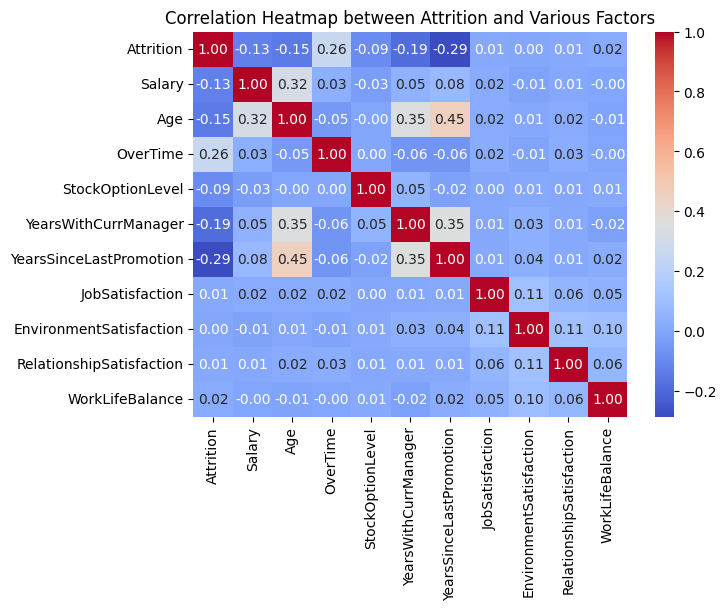

In [61]:

# Plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(Attrition_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Attrition and Various Factors')
plt.show()

### AttritionRate Per OverTime

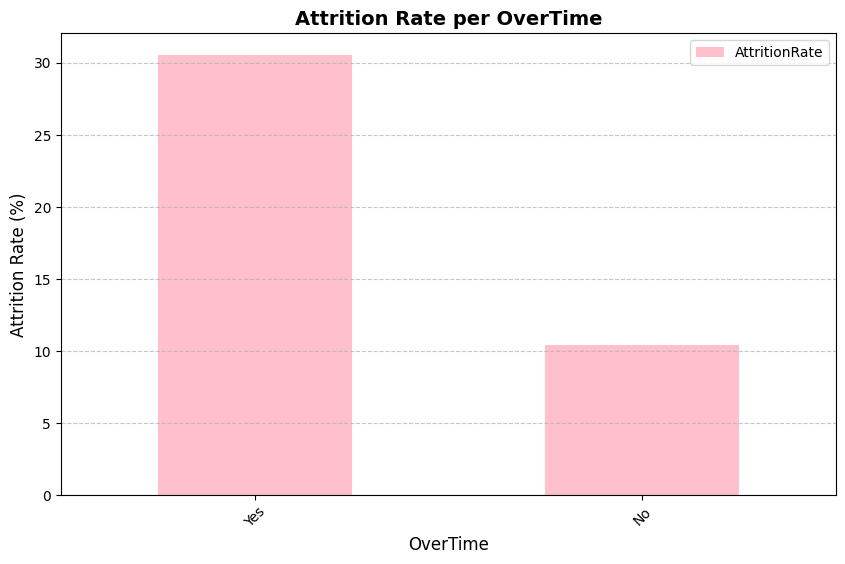

In [47]:
AttritionRate_OverTime = HR_Employee.groupby("OverTime").agg(
    AttritionCount = ('Attrition','sum'),
    TotalEmployees = ('Attrition','count'))
AttritionRate_OverTime["AttritionRate"] = round(
    (AttritionRate_OverTime["AttritionCount"] / AttritionRate_OverTime["TotalEmployees"])*100,2)
AttritionRate_OverTime = AttritionRate_OverTime.sort_values(by="AttritionRate", ascending=False)
AttritionRate_OverTime = AttritionRate_OverTime.reset_index()

# Plot
AttritionRate_OverTime.plot(x="OverTime", y="AttritionRate", kind='bar', stacked=True, figsize=(10, 6), color='pink')
plt.title("Attrition Rate per OverTime", fontsize=14, fontweight='bold')
plt.xlabel("OverTime", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Attrition Per JobRole:
Sales Repsentative & Recruiter

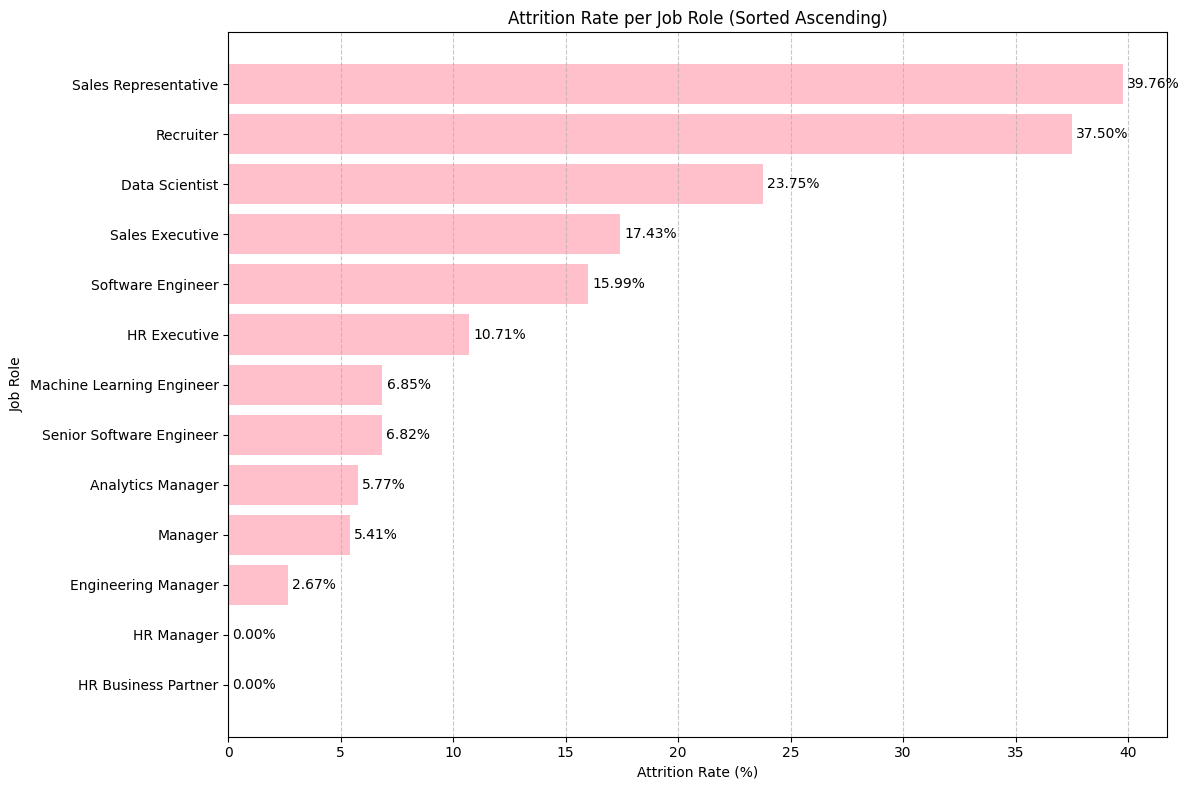

In [48]:

# Multiply attrition rate by 100 for display as percentage
attrition_job_sorted['Attrition_Percent'] = attrition_job_sorted['Attrition'] * 100

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(attrition_job_sorted['JobRole'], attrition_job_sorted['Attrition_Percent'], color='pink')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Role')
plt.title('Attrition Rate per Job Role (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels without a loop
plt.bar_label(bars, fmt='%.2f%%', padding=3)

plt.tight_layout()
plt.show()


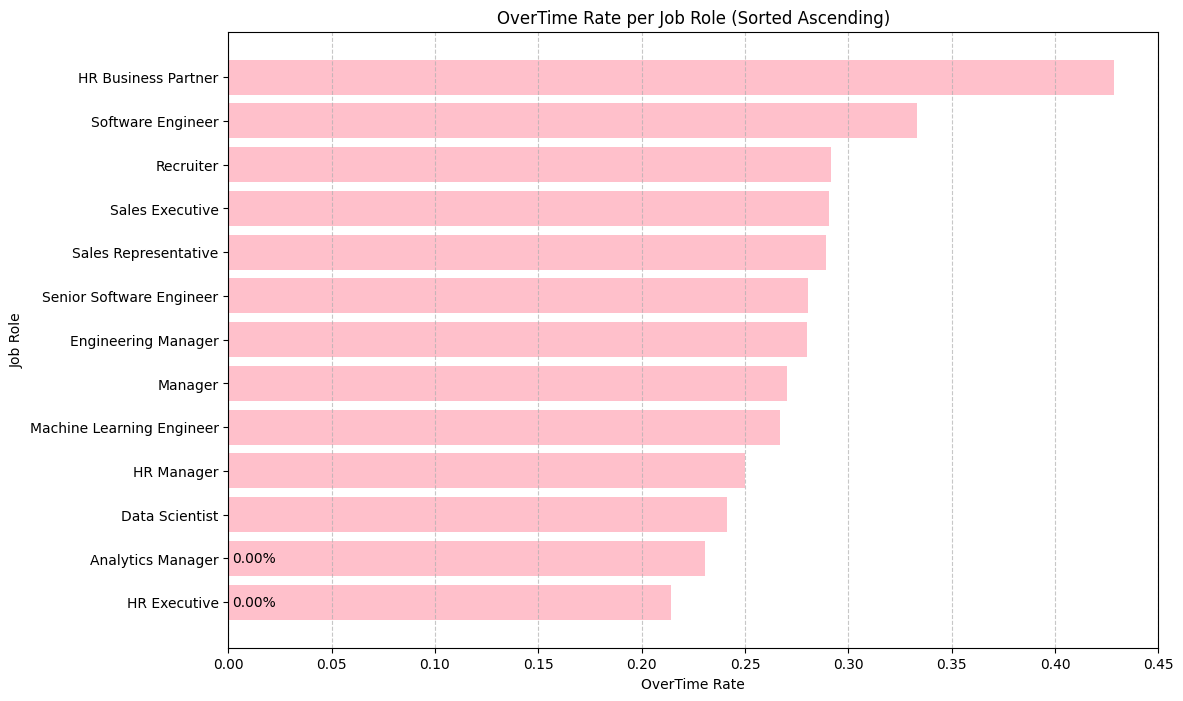

In [50]:

# Calculate the OverTime rate per JobRole
OverTime_rate = HR_Employee.groupby('JobRole')['OverTime'].mean().reset_index()

# Sort the job roles by attrition rate in ascending order
OverTime_rate_sorted = OverTime_rate.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_rate_sorted

# Plot the sorted OverTime rate per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_rate_sorted['JobRole'], OverTime_rate_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Job Role')
plt.title('OverTime Rate per Job Role (Sorted Ascending)')

# Add data labels without a loop
plt.bar_label(bars, fmt='%.2f%%', padding=3)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

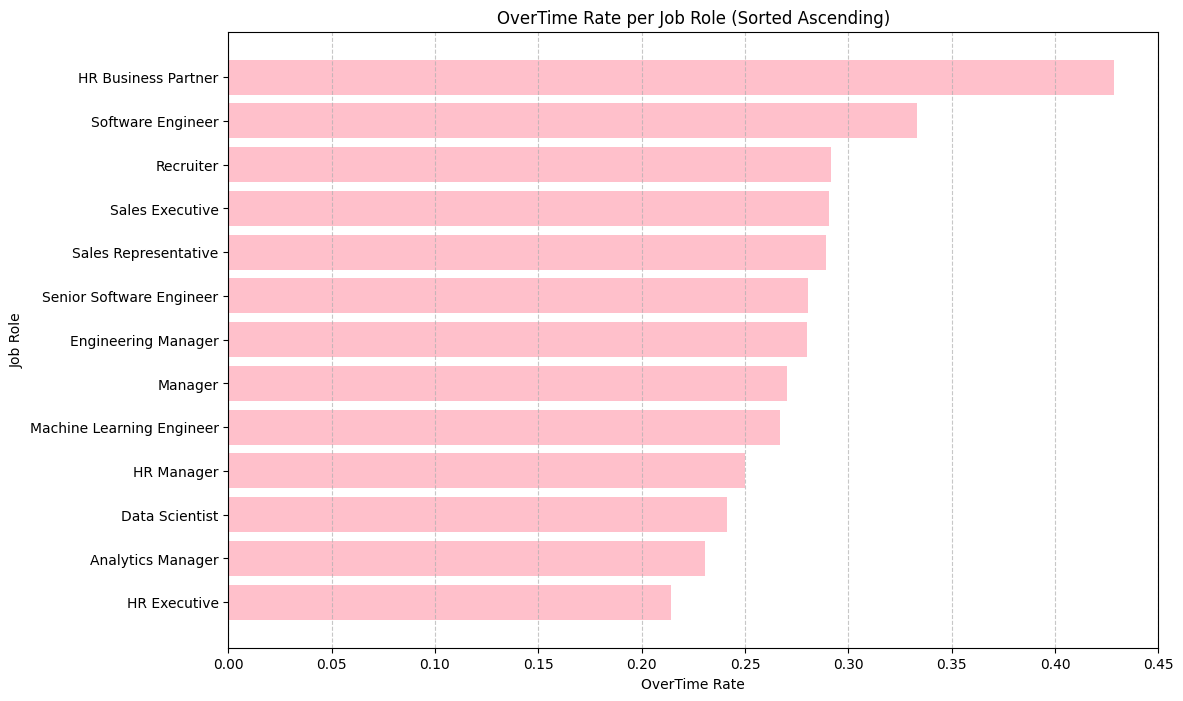

In [49]:

# Calculate the OverTime rate per JobRole
OverTime_rate = HR_Employee.groupby('JobRole')['OverTime'].mean().reset_index()

# Sort the job roles by attrition rate in ascending order
OverTime_rate_sorted = OverTime_rate.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_rate_sorted

# Plot the sorted OverTime rate per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_rate_sorted['JobRole'], OverTime_rate_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Job Role')
plt.title('OverTime Rate per Job Role (Sorted Ascending)')

# Add data labels without a loop
plt.bar_label(bars, fmt='%.2f%%', padding=3)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per JobRole :
Recruiter Is Lowest

In [72]:
print(HR_Employee.dtypes)

EmployeeID                         object
FirstName                          object
LastName                           object
Gender                             object
Age                                 int64
BusinessTravel                     object
Department                         object
DistanceFromHome(KM)                int64
State                              object
Ethnicity                          object
Education                           int64
EducationField                     object
JobRole                            object
MaritalStatus                      object
Salary                              int64
StockOptionLevel                    int64
OverTime                            int64
HireDate                   datetime64[ns]
Attrition                           int64
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
AgeRange                          

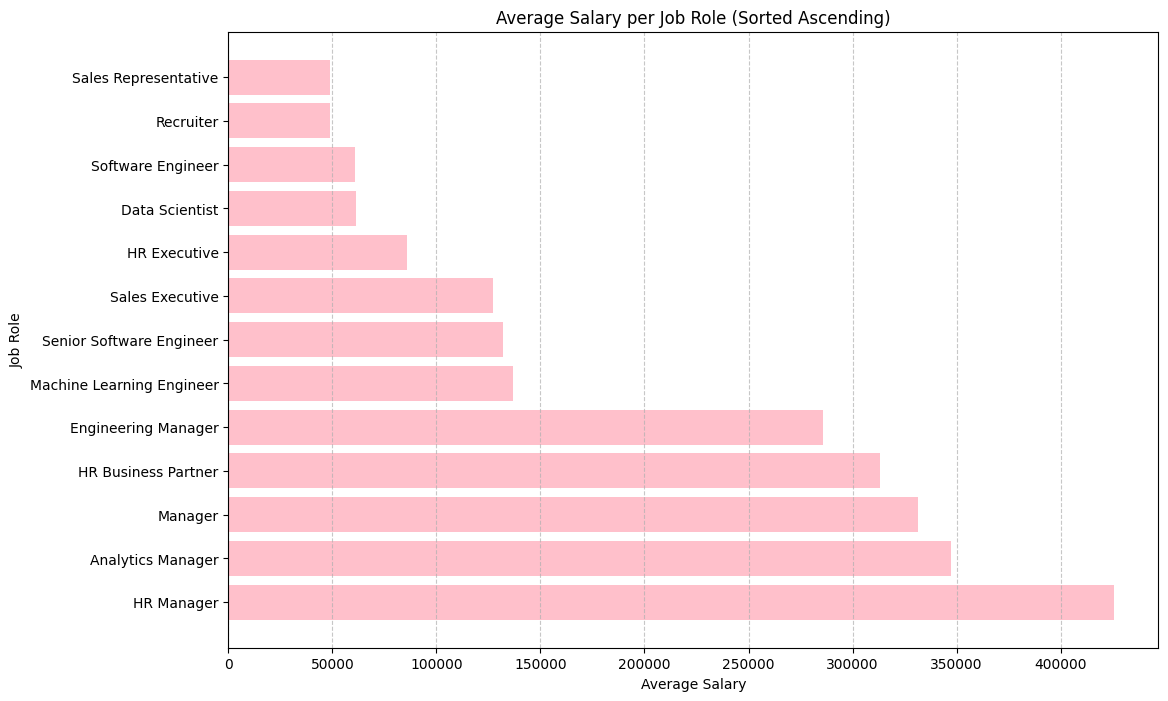

In [66]:
# Calculate the average salary per JobRole
average_salary = HR_Employee.groupby('JobRole')['Salary'].mean().reset_index()

# Sort the job roles by average salary in ascending order
average_salary_sorted = average_salary.sort_values(by='Salary', ascending=False)

# Display the sorted average salary
average_salary_sorted

# Plot the sorted average salary per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(average_salary_sorted['JobRole'], average_salary_sorted['Salary'], color='pink')
plt.xlabel('Average Salary')
plt.ylabel('Job Role')
plt.title('Average Salary per Job Role (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per Department:
Sales is highest Attrition

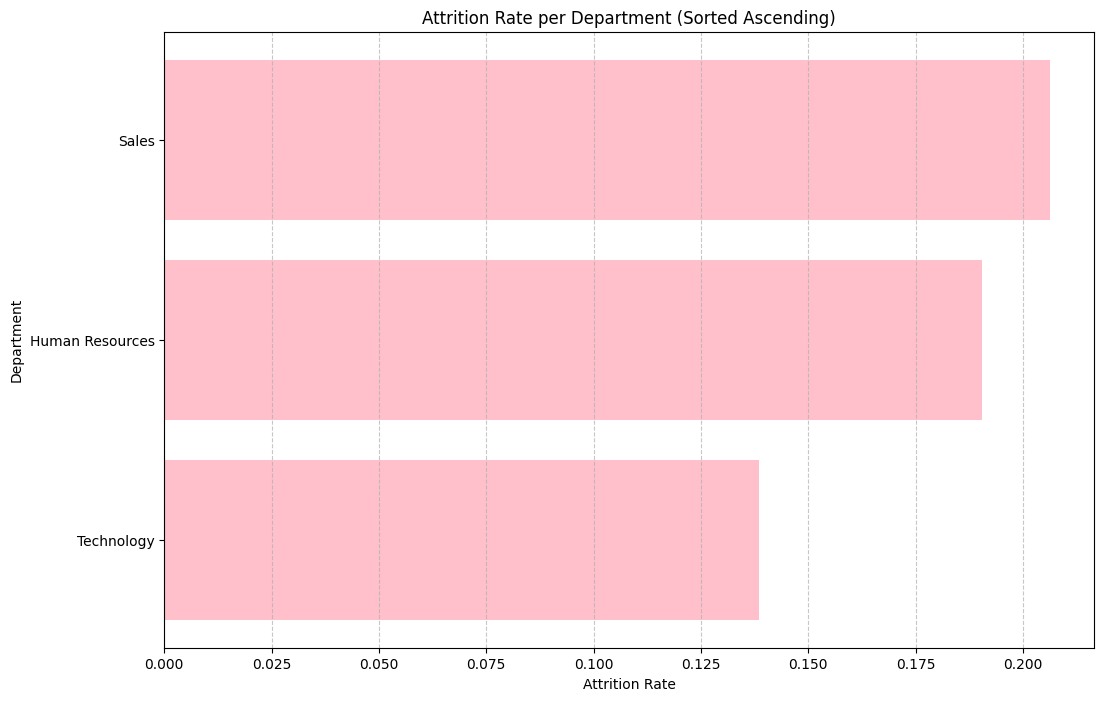

In [67]:
# Calculate the attrition rate per Department
attrition_dept= HR_Employee.groupby('Department')['Attrition'].mean().reset_index()

# Sort the Department by attrition rate in ascending order
attrition_dept_sorted = attrition_dept.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_dept_sorted

# Plot the sorted attrition rate per Department with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_dept_sorted['Department'], attrition_dept_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('Department')
plt.title('Attrition Rate per Department (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# OverTime Per Department:

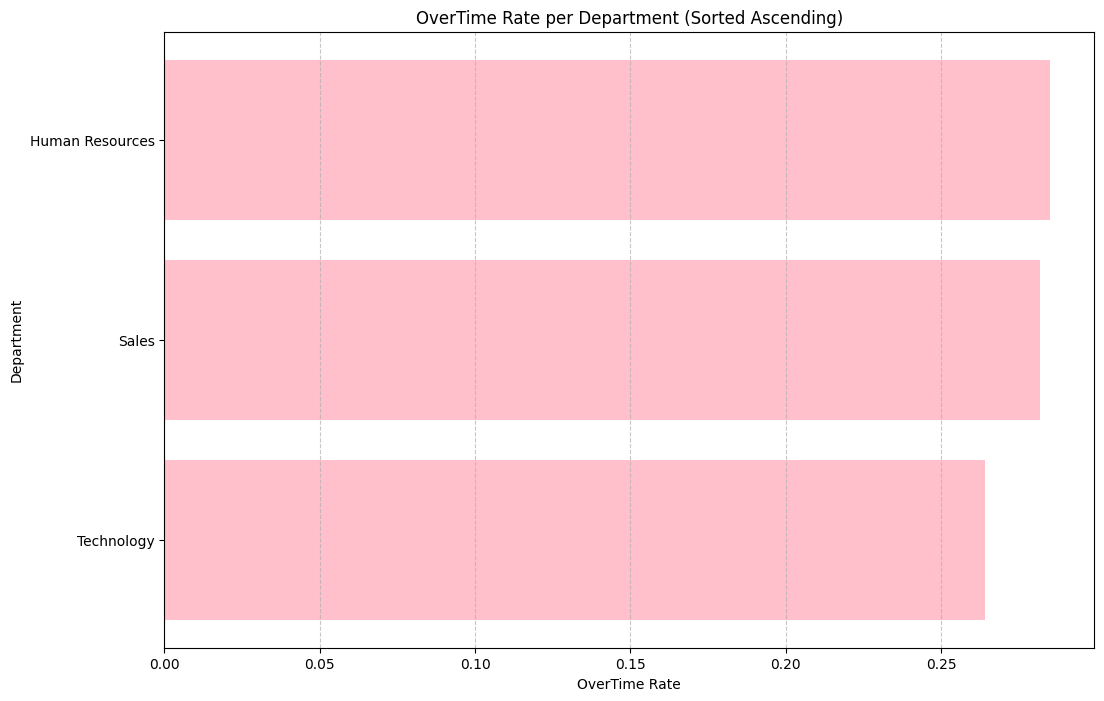

In [68]:
# Calculate the OverTime rate per Department
OverTime_Dept = HR_Employee.groupby('Department')['OverTime'].mean().reset_index()

# Sort the job roles by attrition rate in ascending order
OverTime_Dept_sorted = OverTime_Dept.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Dept_sorted

# Plot the sorted OverTime rate per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Dept_sorted['Department'], OverTime_Dept_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Department')
plt.title('OverTime Rate per Department (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per Department:


In [131]:
Avg_SalaryByDept = HR_Employee.groupby('Department')['Salary'].mean().reset_index()
Avg_SalaryByDept

,Department,Salary
0,Human Resources,119698.809524
1,Sales,119566.158837
2,Technology,109436.410417


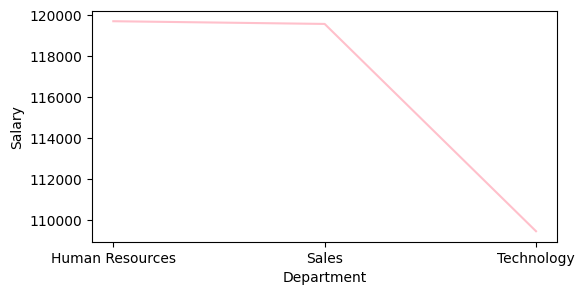

In [132]:
#Line Chart >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
plt.figure(figsize=(6,3))
sns.lineplot(x=Avg_SalaryByDept.Department, y=Avg_SalaryByDept.Salary, color='pink')
plt.show()

# Attrition Per BuisnessTravel:
Frequent Traveller is highest

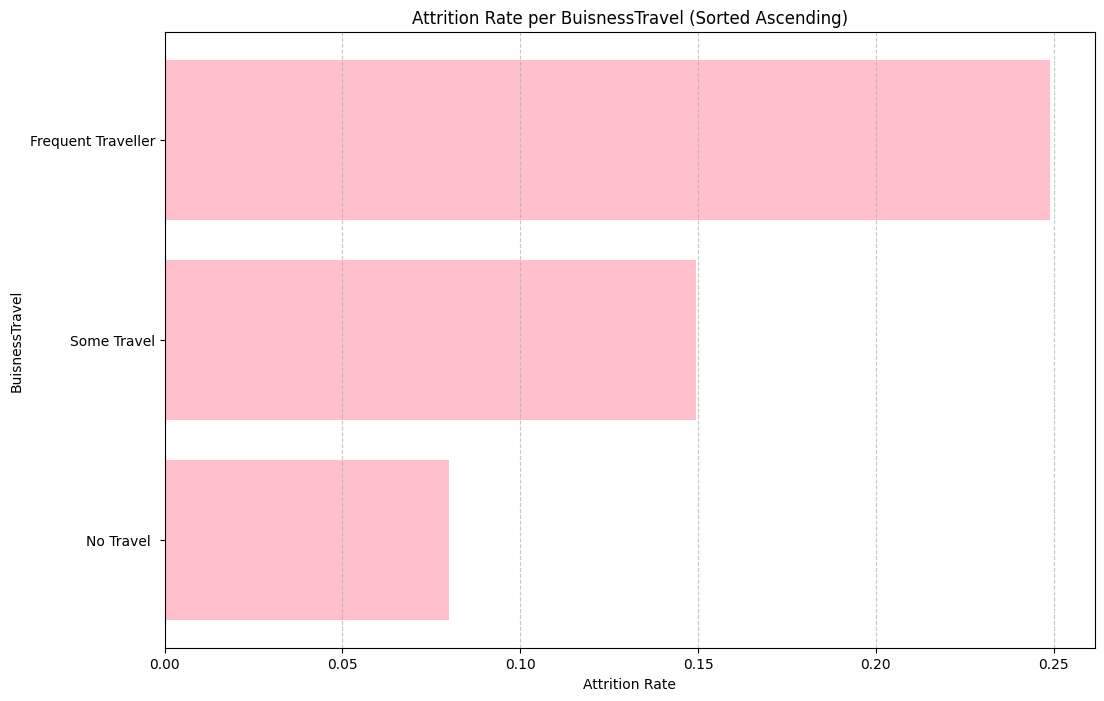

In [133]:

# Calculate the attrition rate per JobRole
attrition_buisness= HR_Employee.groupby('BusinessTravel')['Attrition'].mean().reset_index()

# Sort the BuisnessTravel by attrition rate in ascending order
attrition_buisness_sorted = attrition_buisness.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_buisness_sorted

# Plot the sorted attrition rate per BuisnessTravel with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_buisness_sorted['BusinessTravel'], attrition_buisness_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('BuisnessTravel')
plt.title('Attrition Rate per BuisnessTravel (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# OverTime Per BuisnessTravel:
Frequent Traveller is highest

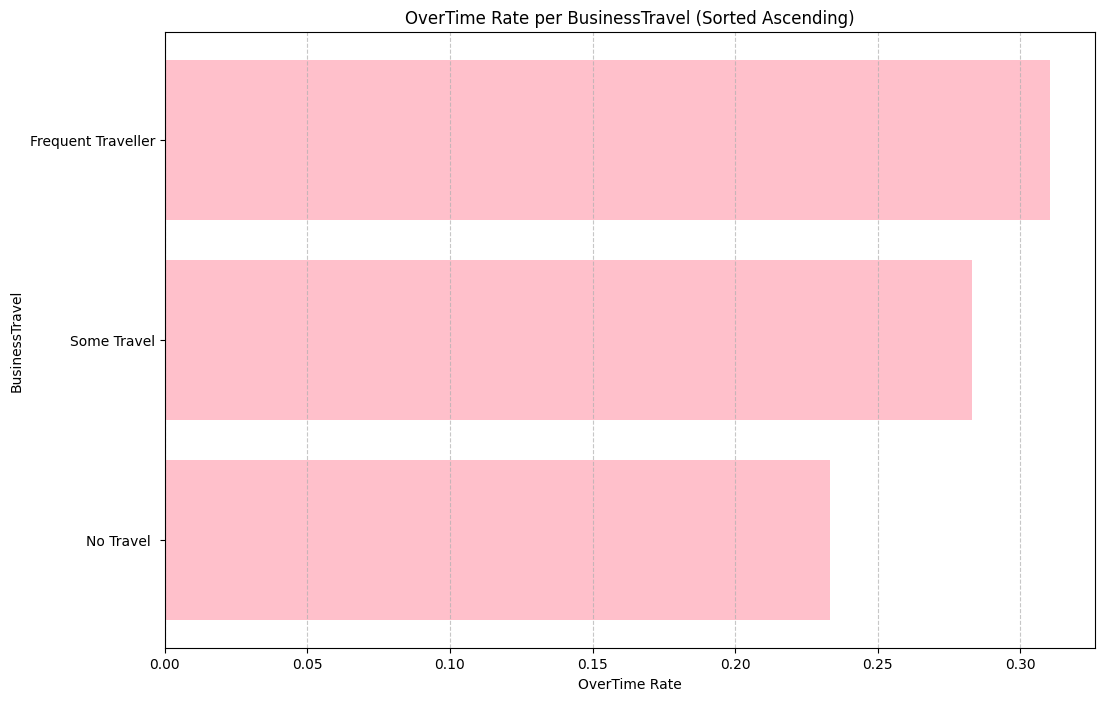

In [134]:
# Calculate the OverTime rate per BusinessTravel
OverTime_Business = HR_Employee.groupby('BusinessTravel')['OverTime'].mean().reset_index()

# Sort the BusinessTravel by attrition rate in ascending order
OverTime_Business_sorted = OverTime_Business.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Business_sorted

# Plot the sorted OverTime rate per BusinessTravel with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Business_sorted['BusinessTravel'], OverTime_Business_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('BusinessTravel')
plt.title('OverTime Rate per BusinessTravel (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per MaritalStatus:
Single Is The Highest

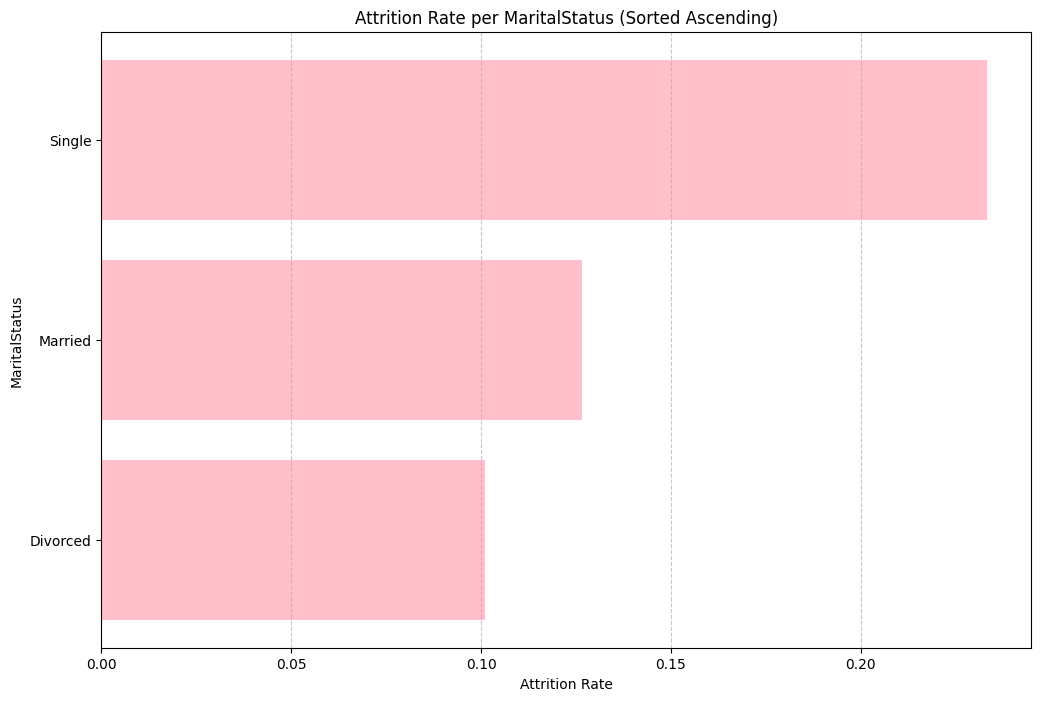

In [135]:
# Calculate the attrition rate per MaritalStatus
attrition_Marital= HR_Employee.groupby('MaritalStatus')['Attrition'].mean().reset_index()

# Sort the BuisnessTravel by attrition rate in ascending order
attrition_Marital_sorted = attrition_Marital.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Marital_sorted

# Plot the sorted attrition rate per BuisnessTravel with purple color
plt.figure(figsize=(12, 8))
plt.barh(attrition_Marital_sorted['MaritalStatus'], attrition_Marital_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('MaritalStatus')
plt.title('Attrition Rate per MaritalStatus (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per MaritalStatus:
Single Is The Lowest

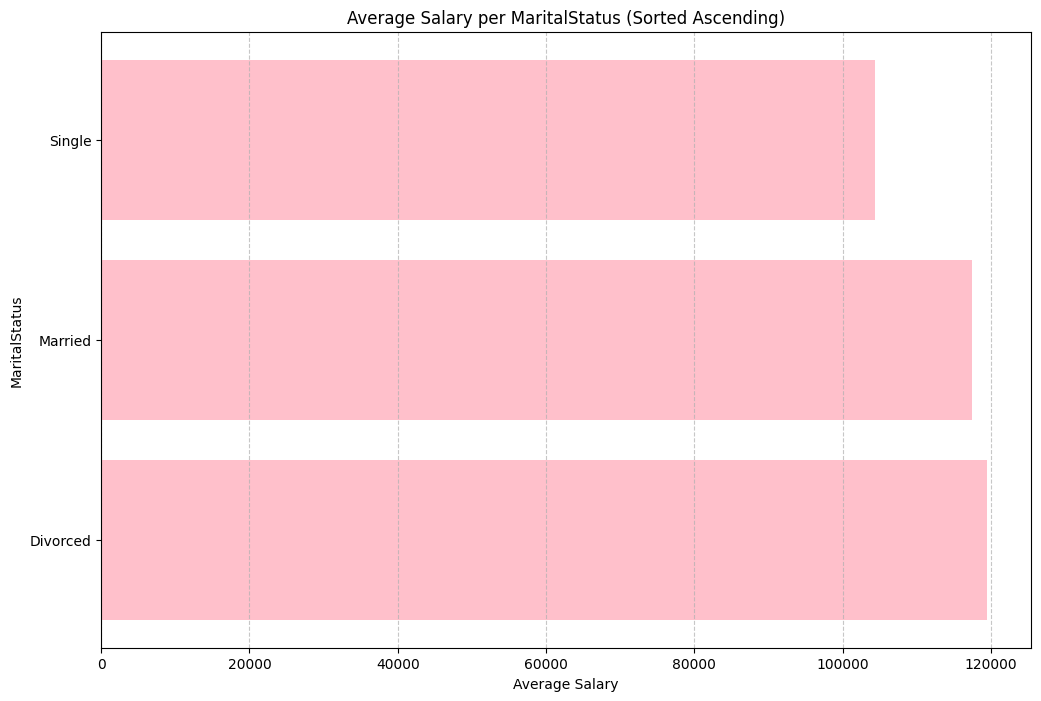

In [136]:
# Calculate the average salary per JobRole
average_salary_Marital = HR_Employee.groupby('MaritalStatus')['Salary'].mean().reset_index()

# Sort the job roles by average salary in ascending order
average_salary_Marital_sorted = average_salary_Marital.sort_values(by='Salary', ascending=False)

# Display the sorted average salary
average_salary_Marital_sorted

# Plot the sorted average salary per JobRole with purple color
plt.figure(figsize=(12, 8))
plt.barh(average_salary_Marital_sorted['MaritalStatus'], average_salary_Marital_sorted['Salary'], color='pink')
plt.xlabel('Average Salary')
plt.ylabel('MaritalStatus')
plt.title('Average Salary per MaritalStatus (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per EducationField:
Technical Degree is The Highest Attrition

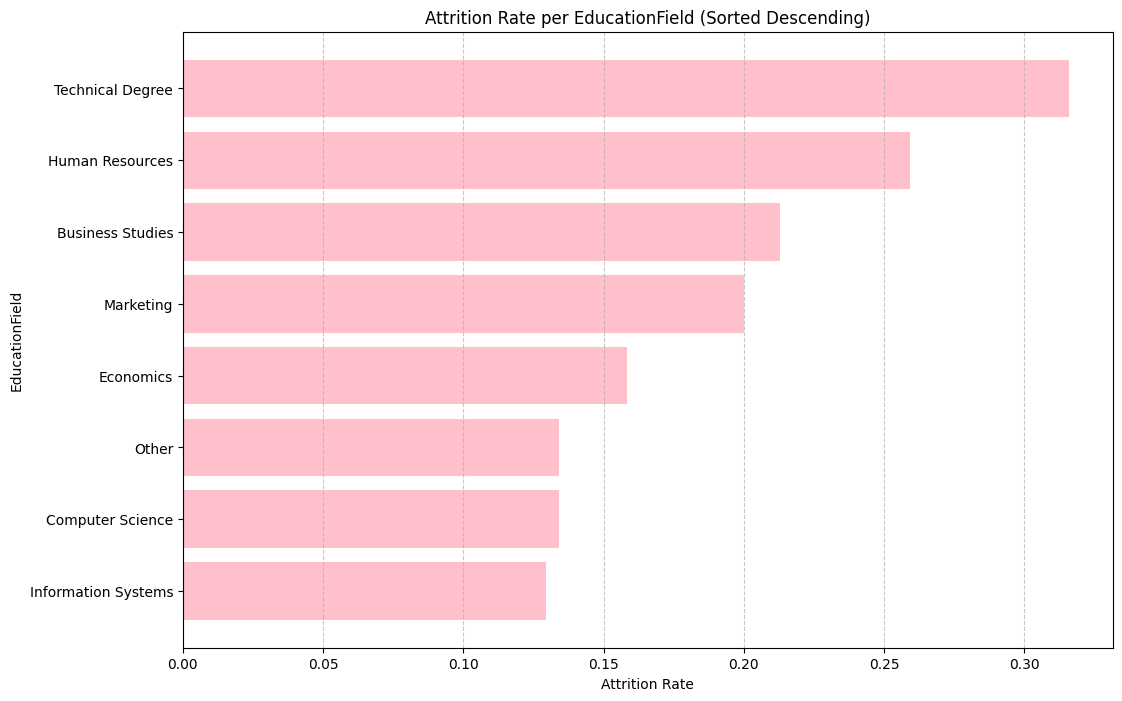

In [137]:
# Calculate the attrition rate per EducationField
attrition_Field= HR_Employee.groupby('EducationField')['Attrition'].mean().reset_index()

# Sort the EducationField by attrition rate in ascending order
attrition_Field_sorted = attrition_Field.sort_values(by='Attrition', ascending=True)

# Display the sorted attrition rate
attrition_Field_sorted

# Plot the sorted attrition rate per EducationField 
plt.figure(figsize=(12, 8))
plt.barh(attrition_Field_sorted['EducationField'], attrition_Field_sorted['Attrition'], color='pink')
plt.xlabel('Attrition Rate')
plt.ylabel('EducationField')
plt.title('Attrition Rate per EducationField (Sorted Descending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per EducationField :
Technical Degree id the Lowest Salary

In [138]:
Avg_SalaryByEduField = HR_Employee.groupby('EducationField')['Salary'].mean().reset_index().sort_values(by='Salary',ascending=False)
Avg_SalaryByEduField

,EducationField,Salary
3,Human Resources,145565.851852
5,Marketing,124277.609231
4,Information Systems,114380.537190
2,Economics,112219.851485
1,Computer Science,109353.993182
0,Business Studies,98406.670213
6,Other,96341.853659
7,Technical Degree,94873.552632


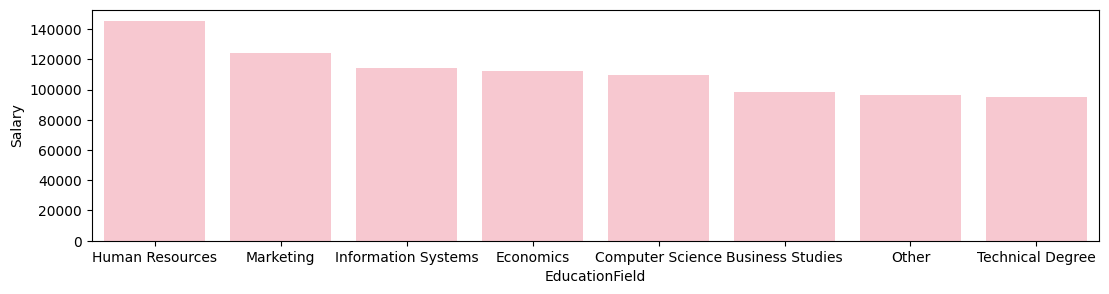

In [139]:
plt.figure(figsize=(13,3))
sns.barplot(x=Avg_SalaryByEduField.EducationField, y=Avg_SalaryByEduField.Salary, color='pink')
plt.show()

# OverTime Per EducationField:
Technical Degree is The Highest OverTime

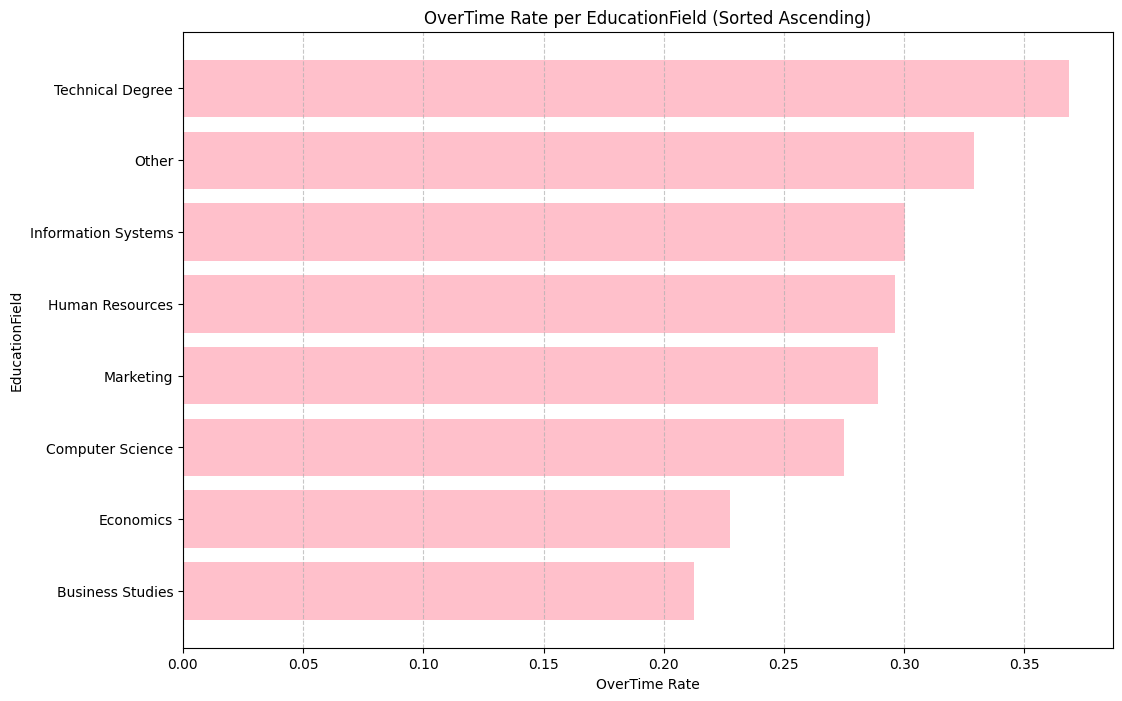

In [140]:
# Calculate the OverTime rate per EducationField
OverTime_Field = HR_Employee.groupby('EducationField')['OverTime'].mean().reset_index()

# Sort the EducationField by attrition rate in ascending order
OverTime_Field_sorted = OverTime_Field.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Field_sorted

# Plot the sorted OverTime rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Field_sorted['EducationField'], OverTime_Field_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('EducationField')
plt.title('OverTime Rate per EducationField (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition Per EducationLevel:
NO FormalQualifications is the Highest Attrition

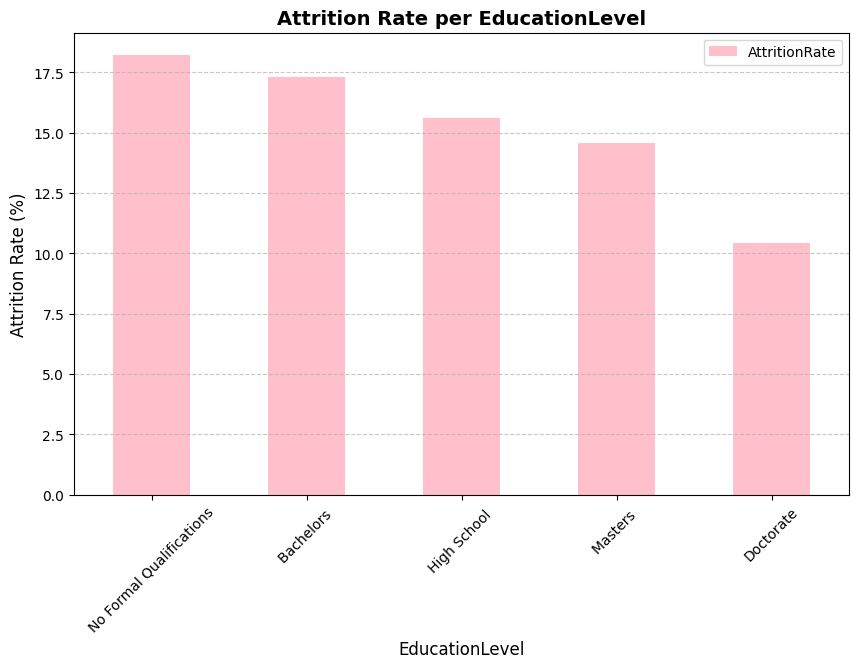

In [141]:
AttritionRate_EducationLevel = HR_Employee.groupby("EducationLevel").agg(
    AttritionCount = ('Attrition','sum'),
    TotalEmployees = ('Attrition','count'))
AttritionRate_EducationLevel["AttritionRate"] = round(
    (AttritionRate_EducationLevel["AttritionCount"] / AttritionRate_EducationLevel["TotalEmployees"])*100,2)
AttritionRate_EducationLevel = AttritionRate_EducationLevel.sort_values(by="AttritionRate", ascending=False)
AttritionRate_EducationLevel = AttritionRate_EducationLevel.reset_index()

# Plot
AttritionRate_EducationLevel.plot(x="EducationLevel", y="AttritionRate", kind='bar', stacked=True, figsize=(10, 6), color='pink')
plt.title("Attrition Rate per EducationLevel", fontsize=14, fontweight='bold')
plt.xlabel("EducationLevel", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Salary By EducationLevel  
NO FormalQualifications Is THe Lowest Salary

In [142]:
Avg_SalaryByEduLevel = HR_Employee.groupby('EducationLevel')['Salary'].mean().reset_index().sort_values(by='Salary',ascending=False)
Avg_SalaryByEduLevel

,EducationLevel,Salary
1,Doctorate,154268.791667
3,Masters,117641.057789
0,Bachelors,115405.430070
2,High School,105180.535461
4,No Formal Qualifications,94983.482353


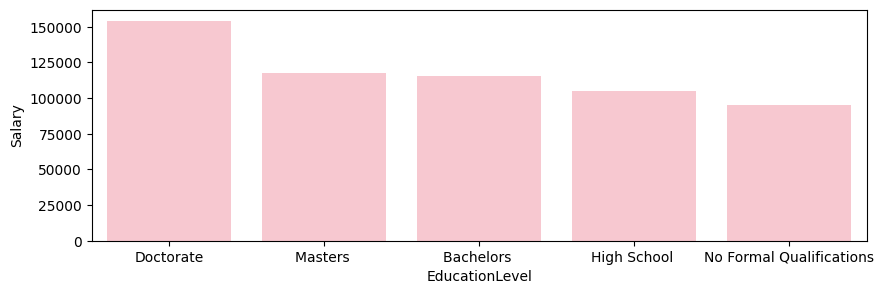

In [143]:
plt.figure(figsize=(10,3))
sns.barplot(x=Avg_SalaryByEduLevel.EducationLevel,y=Avg_SalaryByEduLevel.Salary,color='pink')
plt.show()

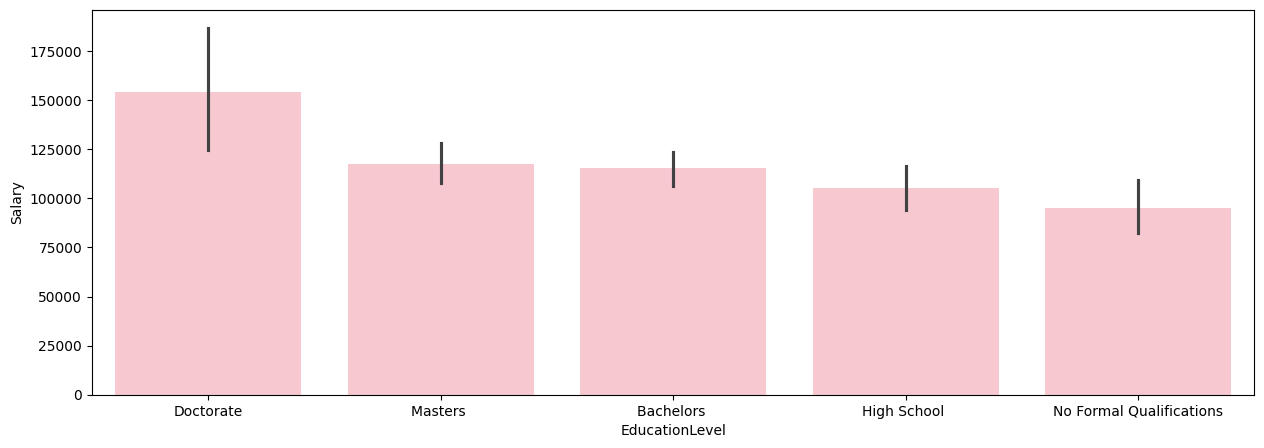

In [144]:
plt.figure(figsize=(15, 5))
sns.barplot(x=HR_Employee.EducationLevel, y=HR_Employee.Salary, data=HR_Employee, color="pink")
plt.show()

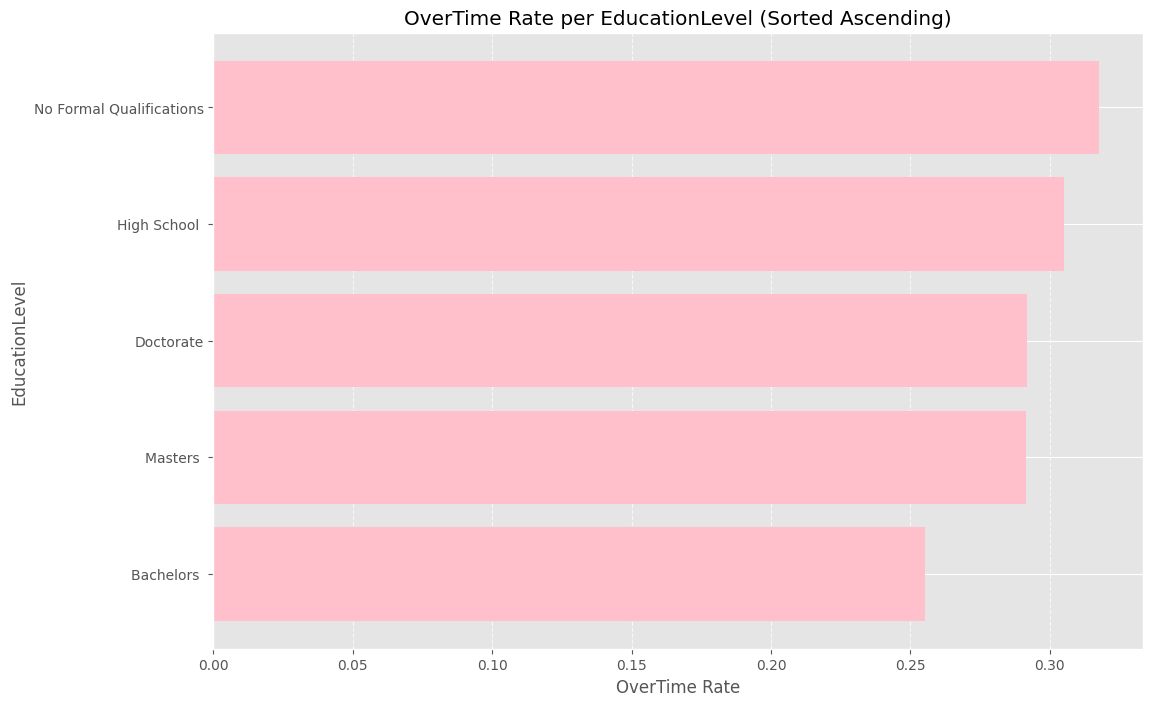

In [97]:
# Calculate the OverTime rate per EducationLevel
OverTime_Level = HR_Employee.groupby('EducationLevel')['OverTime'].mean().reset_index()

# Sort the EducationField by attrition rate in ascending order
OverTime_Level_sorted = OverTime_Level.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Level_sorted

# Plot the sorted OverTime rate per EducationLevel with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Level_sorted['EducationLevel'], OverTime_Level_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('EducationLevel')
plt.title('OverTime Rate per EducationLevel (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Attrition By Age&Gender
(Male 18-30 ) is the Highest Attrition

In [149]:
attrition_per_AgeRange = HR_Employee.groupby("AgeRange").agg(
    AttritionCount=('Attrition', 'sum'),
    TotalEmployees=('Attrition', 'count') ) 
attrition_per_AgeRange["AttritionRate"] = round(
    (attrition_per_AgeRange["AttritionCount"] / attrition_per_AgeRange["TotalEmployees"]) * 100, 2
)
attrition_per_AgeRange = attrition_per_AgeRange.sort_values(by="AttritionRate", ascending=False)
attrition_per_AgeRange = attrition_per_AgeRange.reset_index()
attrition_per_AgeRange

,AgeRange,AttritionCount,TotalEmployees,AttritionRate
0,18 - 30,195,955,20.42
1,30 - 40,27,289,9.34
2,40 - 50,15,225,6.67
3,Above 50,0,1,0.00


In [17]:
# Count employees who left by AgeRange and Gender
Att_CountAG = HR_Employee[HR_Employee['Attrition'] == 'Yes'].groupby(['AgeRange', 'Gender'])['EmployeeID'].count()

# Count total employees by AgeRange and Gender
Total_EmpAG = HR_Employee.groupby(['AgeRange', 'Gender'])['EmployeeID'].count()


# Calculate Attrition Rate (%)
Att_RateAG = ((Att_CountAG / Total_EmpAG) * 100).round(1)
Att_RateAG = Att_RateAG.fillna(0).astype(int)
Att_RateAG

AgeRange  Gender
18 - 30   Female    20
          Male      21
          OTher     17
30 - 40   Female    10
          Male      10
          OTher      0
40 - 50   Female     4
          Male       9
          OTher      7
Above 50  Male       0
Name: EmployeeID, dtype: int64

# Plotting Result:

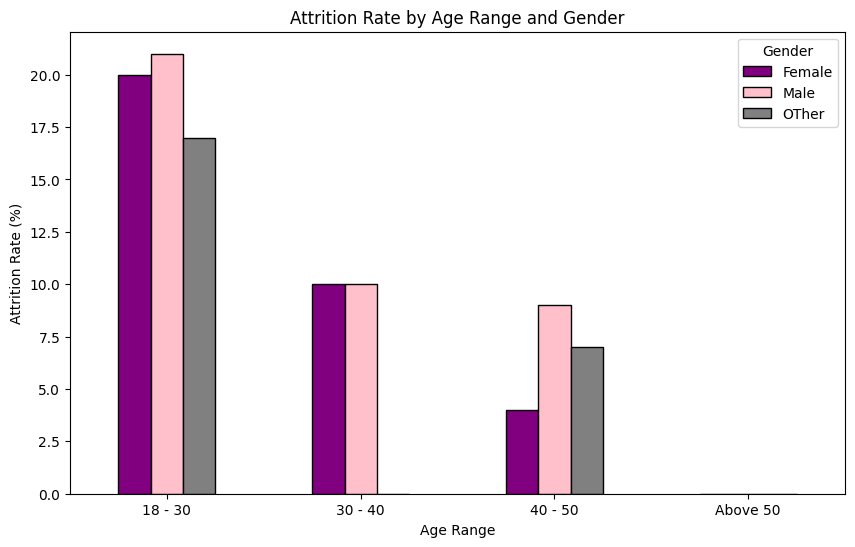

In [18]:
import matplotlib.pyplot as plt

# Unstack data for visualization
Attrition_Data = Att_RateAG.unstack()

# Define custom colors for bars
colors = ['purple', 'pink', 'gray']

# Plot grouped bar chart with custom colors
Attrition_Data.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

# Add labels and title
plt.xlabel("Age Range")
plt.ylabel("Attrition Rate (%)")
plt.title("Attrition Rate by Age Range and Gender")  # ✅ Fixed string issue
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.legend(title="Gender")

# Display the chart
plt.show()


# Overtime Per AgeRange:
Male(18-30) Is Highest Overtime

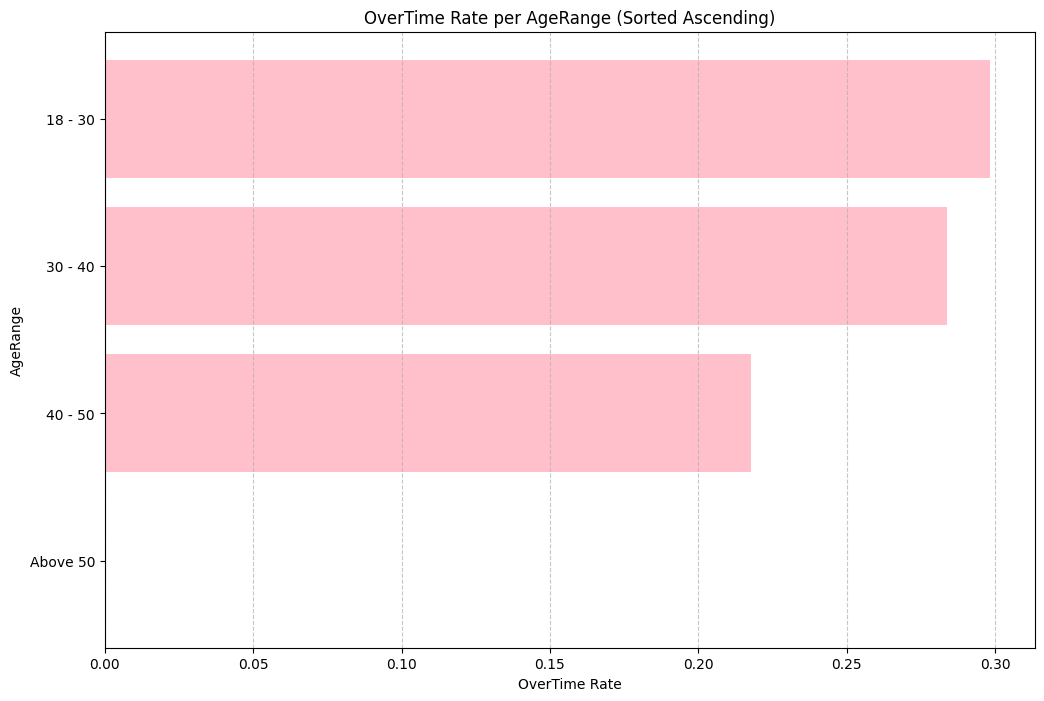

In [151]:
# Calculate the OverTime rate per AgeRange
OverTime_AgeRange = HR_Emp.groupby('AgeRange')['OverTime'].mean().reset_index()

# Sort the AgeRange by attrition rate in ascending order
OverTime_AgeRange_sorted = OverTime_AgeRange.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_AgeRange_sorted

# Plot the sorted OverTime rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_AgeRange_sorted['AgeRange'], OverTime_AgeRange_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('AgeRange')
plt.title('OverTime Rate per AgeRange (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per AgeRange:
Male(18 - 30) IS Lowest Salary

In [81]:
Avg_SalaryByAge = HR_Emp.groupby('AgeRange')['Salary'].mean().reset_index().sort_values(by='Salary',ascending=False)
Avg_SalaryByAge

,AgeRange,Salary
3,Above 50,232658.000000
2,40 - 50,190855.297778
1,30 - 40,180775.432526
0,18 - 30,73954.818848


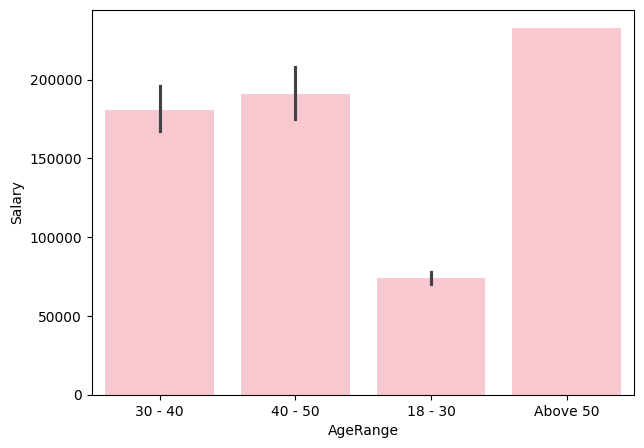

In [150]:
plt.figure(figsize=(7, 5))
sns.barplot(x=HR_Emp.AgeRange, y=HR_Emp.Salary, data=HR_Emp , color='pink')
plt.show()

# Attrition Per Gender :
Male Is Highest Attrition

In [145]:
attrition_per_Gender = HR_Employee.groupby("Gender").agg(
    AttritionCount=('Attrition', 'sum'),
    TotalEmployees=('Attrition', 'count') ) 
attrition_per_Gender["AttritionRate"] = round(
    (attrition_per_Gender["AttritionCount"] / attrition_per_Gender["TotalEmployees"]) * 100, 2
)
attrition_per_Gender = attrition_per_Gender.sort_values(by="AttritionRate", ascending=False)
attrition_per_Gender = attrition_per_Gender.reset_index()
attrition_per_Gender

,Gender,AttritionCount,TotalEmployees,AttritionRate
0,Male,114,651,17.51
1,Female,104,675,15.41
2,OTher,19,144,13.19


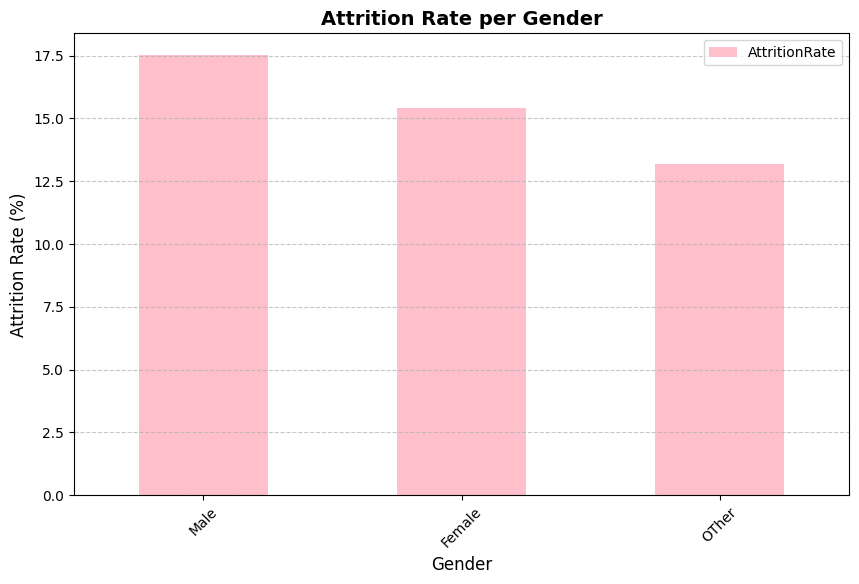

In [146]:
#plot
attrition_per_Gender.plot(x="Gender", y="AttritionRate", kind='bar', stacked=True, figsize=(10, 6), color='pink')
plt.title("Attrition Rate per Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# OverTime Per Gender:
Male Is Highest Overtime

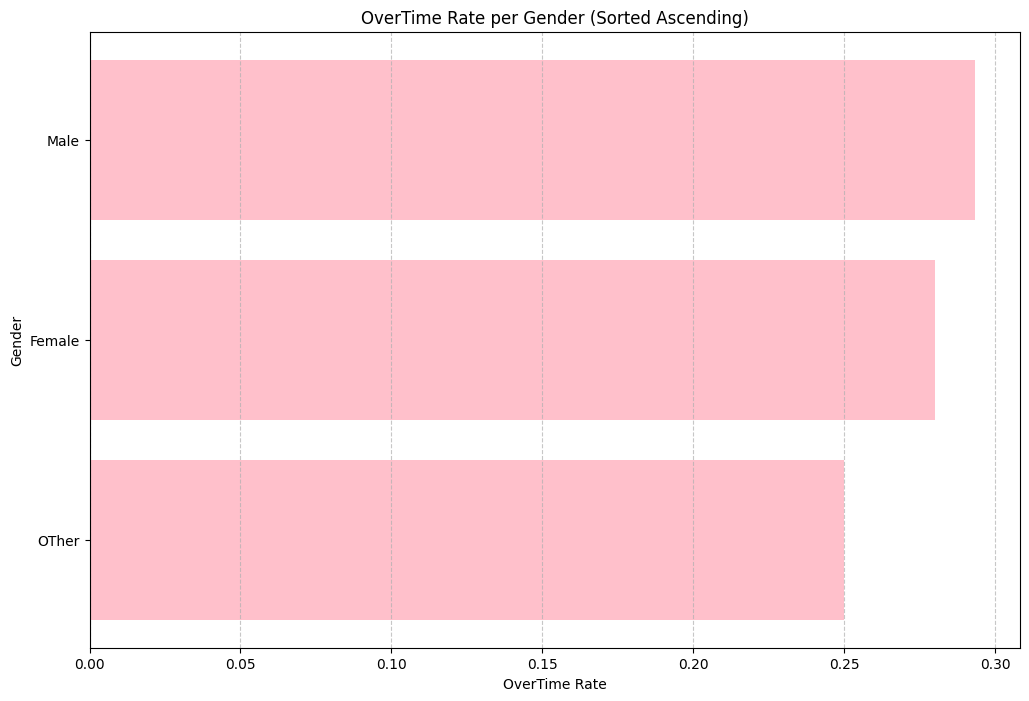

In [147]:
# Calculate the OverTime rate per Gender
OverTime_Gender = HR_Emp.groupby('Gender')['OverTime'].mean().reset_index()

# Sort the Gender by attrition rate in ascending order
OverTime_Gender_sorted = OverTime_Gender.sort_values(by='OverTime', ascending=True)

# Display the sorted OverTime rate
OverTime_Gender_sorted

# Plot the sorted OverTime rate per EducationField with purple color
plt.figure(figsize=(12, 8))
plt.barh(OverTime_Gender_sorted['Gender'], OverTime_Gender_sorted['OverTime'], color='pink')
plt.xlabel('OverTime Rate')
plt.ylabel('Gender')
plt.title('OverTime Rate per Gender (Sorted Ascending)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Salary Per Gender:
Male Is Lowest Salary

In [20]:
Avg_SalaryByGender = HR_Employee.groupby('Gender')['Salary'].mean().reset_index().sort_values(by='Salary',ascending=False)
Avg_SalaryByGender

,Gender,Salary
0,Female,113935.691852
2,OTher,113713.263889
1,Male,111773.809524


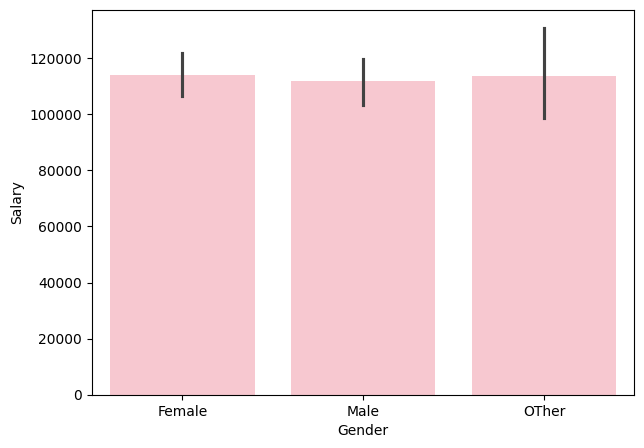

In [148]:
plt.figure(figsize=(7, 5))
sns.barplot(x=HR_Emp.Gender, y=HR_Emp.Salary, data=HR_Emp , color='pink')
plt.show()


# Attrition per YearsAtCompany:
The employee attrition rate decreases as the number of years they have spent at the company increases

In [152]:
attrition_per_YearsAtCompany = HR_Employee.groupby("YearsAtCompany").agg(
    AttritionCount=('Attrition', 'sum'),
    TotalEmployees=('Attrition', 'count') ) 
attrition_per_YearsAtCompany["AttritionRate"] = round(
    (attrition_per_YearsAtCompany["AttritionCount"] / attrition_per_YearsAtCompany["TotalEmployees"]) * 100, 2
)
attrition_per_YearsAtCompany = attrition_per_YearsAtCompany.reset_index()
attrition_per_YearsAtCompany

,YearsAtCompany,AttritionCount,TotalEmployees,AttritionRate
0,0,60,190,31.58
1,1,61,177,34.46
2,2,25,124,20.16
3,3,24,148,16.22
4,4,15,129,11.63
5,5,20,115,17.39
6,6,11,101,10.89
7,7,9,121,7.44
8,8,6,119,5.04
9,9,5,118,4.24


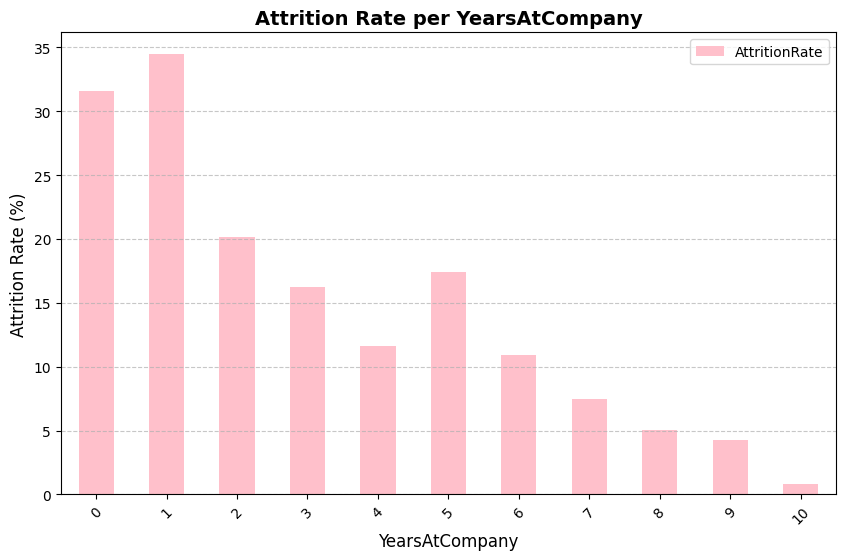

In [153]:
attrition_per_YearsAtCompany.plot(x="YearsAtCompany", y="AttritionRate", kind='bar', stacked=True, figsize=(10, 6), color='pink')
plt.title("Attrition Rate per YearsAtCompany", fontsize=14, fontweight='bold')
plt.xlabel("YearsAtCompany", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Attrition per StockOptionLevel:
The employee attrition rate Mostly decreases as StockOptionLevel increases

In [154]:
attrition_per_StockOptionLevel = HR_Employee.groupby("StockOptionLevel").agg(
    AttritionCount=('Attrition', 'sum'),
    TotalEmployees=('Attrition', 'count') ) 
attrition_per_StockOptionLevel["AttritionRate"] = round(
    (attrition_per_StockOptionLevel["AttritionCount"] / attrition_per_StockOptionLevel["TotalEmployees"]) * 100, 2
)
attrition_per_StockOptionLevel = attrition_per_StockOptionLevel.reset_index()
attrition_per_StockOptionLevel

,StockOptionLevel,AttritionCount,TotalEmployees,AttritionRate
0,0,154,631,24.41
1,1,56,596,9.40
2,2,12,158,7.59
3,3,15,85,17.65


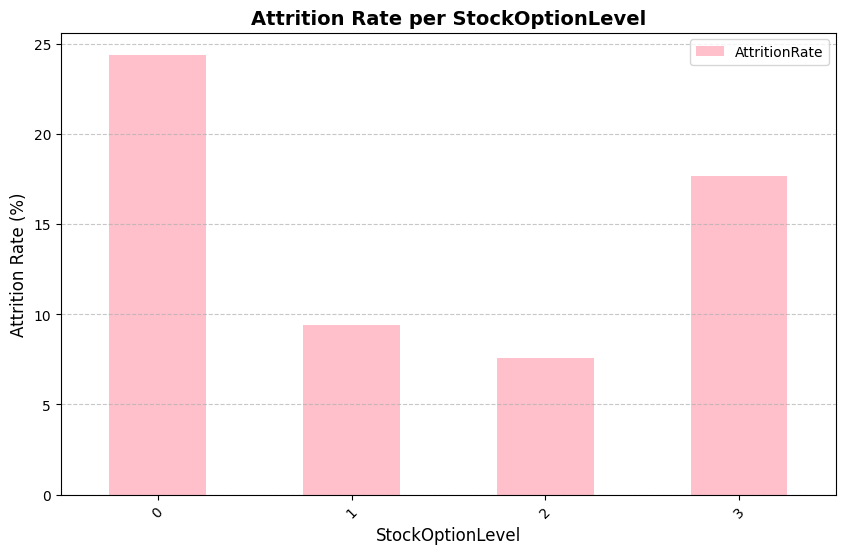

In [155]:
attrition_per_StockOptionLevel.plot(x="StockOptionLevel", y="AttritionRate", kind='bar', stacked=True, figsize=(10, 6), color='pink')
plt.title("Attrition Rate per StockOptionLevel", fontsize=14, fontweight='bold')
plt.xlabel("StockOptionLevel", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Attrition Per YearsWithCurrentManager:
The employee attrition rate Mostly decreases as the number of YearsWithCurrentManager increases

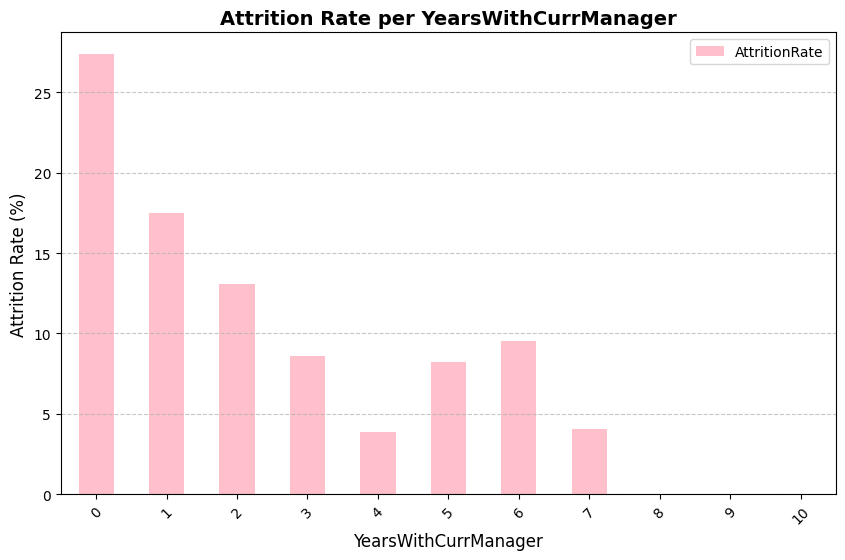

In [156]:
attrition_per_YearsWithCurrManager = HR_Employee.groupby("YearsWithCurrManager").agg(
    AttritionCount=('Attrition', 'sum'),
    TotalEmployees=('Attrition', 'count') ) 
attrition_per_YearsWithCurrManager["AttritionRate"] = round(
    (attrition_per_YearsWithCurrManager["AttritionCount"] / attrition_per_YearsWithCurrManager["TotalEmployees"]) * 100, 2
)
attrition_per_YearsWithCurrManager = attrition_per_YearsWithCurrManager.reset_index()
attrition_per_YearsWithCurrManager


#Plot
attrition_per_YearsWithCurrManager.plot(x="YearsWithCurrManager", y="AttritionRate", kind='bar', stacked=True, figsize=(10, 6), color='pink')
plt.title("Attrition Rate per YearsWithCurrManager", fontsize=14, fontweight='bold')
plt.xlabel("YearsWithCurrManager", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Salary Rate Per Years:
A decreasing salary over the years is a red flag that can impact employee satisfaction, Attrition , Retention
If salaries are declining due to number of Employees who left Company or cost-cutting, economic downturns, or poor financial planning, employees may feel undervalued, leading to higher attrition rates and decreased productivity.

In [157]:
#Get Year From HireRate
HR_Employee['HireYear'] = HR_Employee['HireDate'].dt.year

AvgS = HR_Employee.groupby('HireYear')['Salary'].mean().reset_index()
AvgS

,HireYear,Salary
0,2012,136773.927152
1,2013,137178.691176
2,2014,124978.610294
3,2015,95198.582677
4,2016,87352.807018
5,2017,96130.962264
6,2018,102664.882353
7,2019,103801.931034
8,2020,126860.125984
9,2021,126728.335766


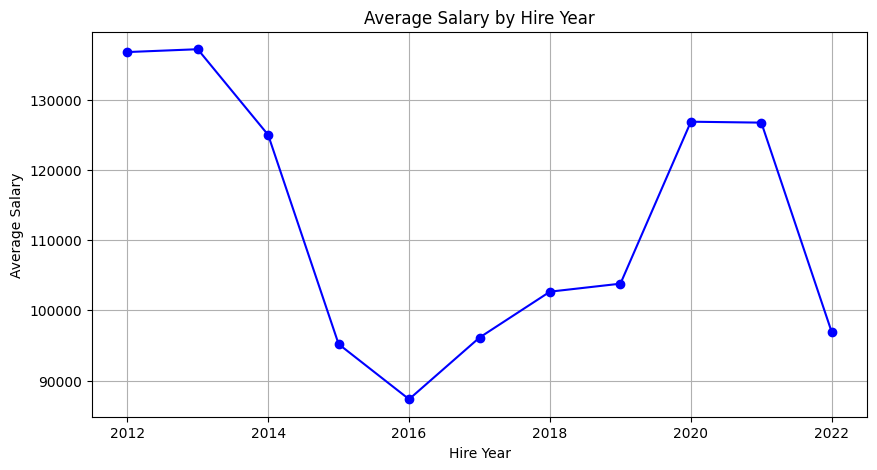

In [158]:
# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(AvgS['HireYear'], AvgS['Salary'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Hire Year')
plt.ylabel('Average Salary')
plt.title('Average Salary by Hire Year')
plt.grid(True)

# Show plot
plt.show()


# Identify Outliers In Salary :

In [163]:
Q1 = HR_Data['Salary'].quantile(0.25)
Q3 = HR_Data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define Ranges for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Outliers = HR_Data[(HR_Data['Salary'] < lower_bound) | (HR_Data['Salary'] > upper_bound)]
Outliers

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeRange,DistanceRange,EducationLevelID,EducationLevel,CurrentDate
16,PR1005,88B8-EB84,3/19/2016,3,4,2,3,1,4,5,...,0,10,9,9,3,30 - 40,Above 40 km,2,High School,2022-03-22
49,PR1035,95D7-1CE9,4/8/2016,3,3,2,1,0,2,3,...,0,10,6,10,8,40 - 50,20-30 km,4,Masters,2022-01-01
63,PR1048,5C03-1009,4/13/2016,3,2,5,1,2,5,5,...,0,10,8,8,7,40 - 50,20-30 km,3,Bachelors,2022-01-14
82,PR1065,DFE3-6FA7,4/22/2016,3,5,5,3,0,2,3,...,1,9,3,9,6,40 - 50,1-10 km,3,Bachelors,2021-05-25
109,PR109,DFE3-6FA7,4/23/2013,3,4,4,3,1,2,4,...,1,9,3,9,6,40 - 50,1-10 km,3,Bachelors,2021-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6581,PR883,8BAB-B4A6,1/18/2016,5,5,2,2,2,4,3,...,0,10,7,9,3,30 - 40,30-40 km,3,Bachelors,2022-01-10
6595,PR896,AB03-8820,1/25/2016,3,5,2,1,1,5,3,...,0,9,5,9,2,40 - 50,1-10 km,1,No Formal Qualifications,2022-03-26
6626,PR924,9DFE-1FD5,2/10/2016,5,5,2,1,0,5,5,...,0,10,0,10,7,40 - 50,1-10 km,3,Bachelors,2022-02-27
6640,PR937,5021-95FC,2/18/2016,3,3,5,3,2,4,3,...,1,5,4,4,0,18 - 30,Above 40 km,3,Bachelors,2018-07-15


# Get unique EmployeeID values for the outliers:

In [164]:
Unique_Outliers = Outliers['EmployeeID'].unique()

# Retrieve corresponding rows in HR_Data using isin without additional indexing
Outliers_Rating = HR_Data[HR_Data['EmployeeID'].isin(Unique_Outliers)][['EmployeeID', 'Salary', 'ManagerRating','YearsAtCompany','OverTime','EducationField','Age','Gender','EducationLevel','Department']]
Outliers_Rating[(Outliers_Rating['ManagerRating']==2) & ((Outliers_Rating['YearsAtCompany']==2) | (Outliers_Rating['YearsAtCompany']==3))]


,EmployeeID,Salary,ManagerRating,YearsAtCompany,OverTime,EducationField,Age,Gender,EducationLevel,Department
4064,3DCC-7FA4,311448,2,3,1,Marketing,34,Female,High School,Sales
4114,200B-1979,339245,2,3,0,Information Systems,50,Male,Bachelors,Technology
4428,3CFD-6622,513325,2,3,0,Information Systems,40,Female,Bachelors,Technology
4829,18CE-8F30,330940,2,3,0,Marketing,31,Female,Doctorate,Sales
4931,C2BF-D441,350101,2,3,0,Computer Science,47,Female,Bachelors,Technology
5297,200B-1979,339245,2,3,0,Information Systems,50,Male,Bachelors,Technology
5629,3CFD-6622,513325,2,3,0,Information Systems,40,Female,Bachelors,Technology
5830,991F-BAF4,350024,2,2,0,Information Systems,33,OTher,High School,Technology
5862,5B0B-B105,360384,2,2,0,Marketing,35,Male,High School,Sales
5916,3EDA-3BDE,371727,2,3,0,Information Systems,31,Male,No Formal Qualifications,Technology


# Scatter plot for All salaries:


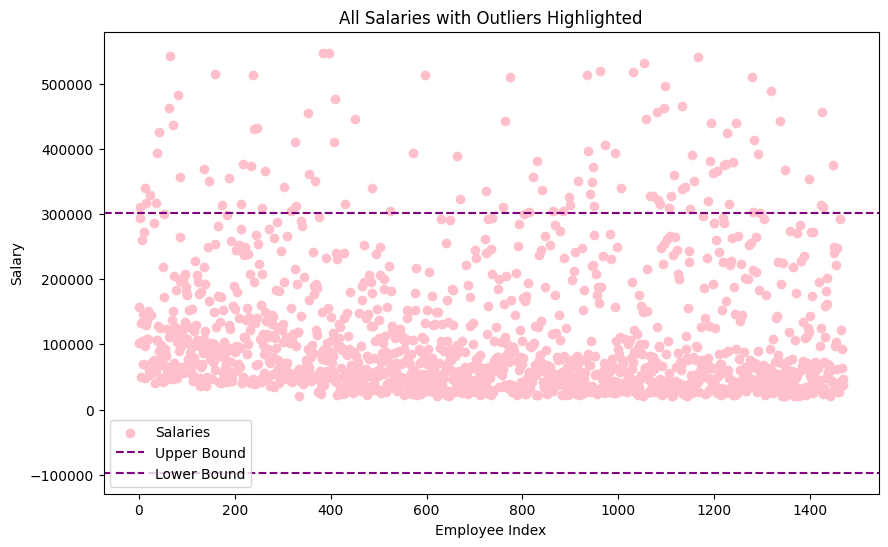

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(HR_Emp)), HR_Emp['Salary'], color='Pink', label='Salaries')
plt.axhline(y=upper_bound, color='Purple', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound, color='Purple', linestyle='--', label='Lower Bound')
plt.title("All Salaries with Outliers Highlighted")
plt.xlabel("Employee Index")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Scatter plot for outliers Salaries:


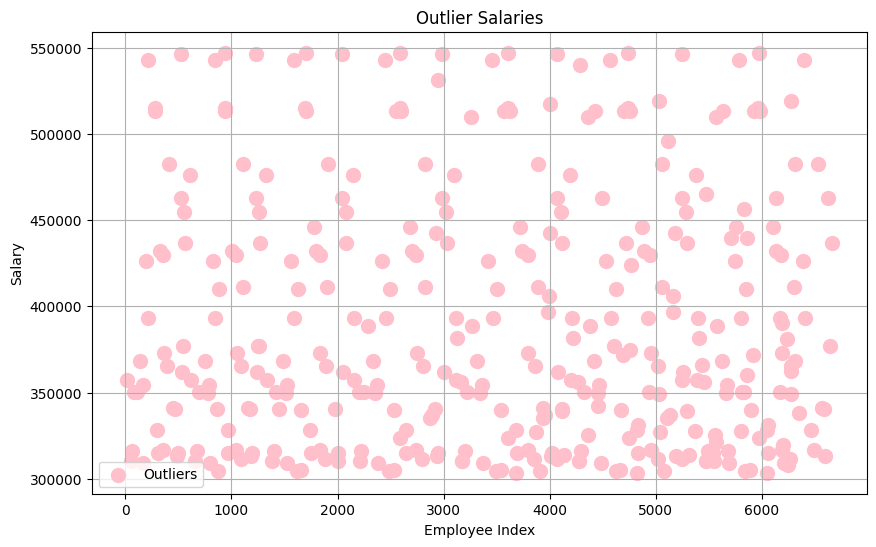

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(Outliers.index, Outliers['Salary'], color='Pink', label='Outliers', s=100)
plt.title("Outlier Salaries")
plt.xlabel("Employee Index")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

# HireCount Per Years

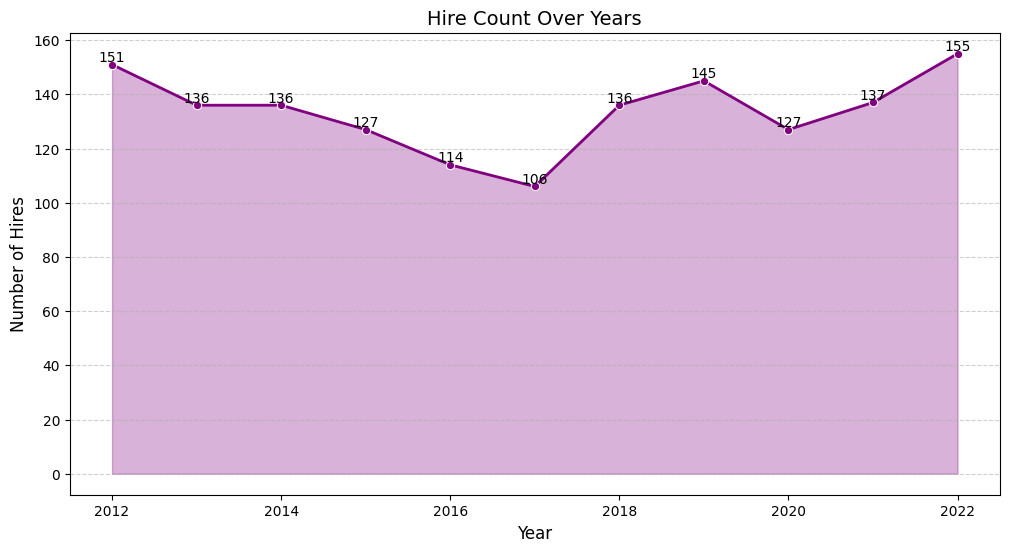

In [46]:
#Extract Year Per HireDate
HR_Employee['HireYear'] = HR_Employee['HireDate'].dt.year

# Count employees hired per year
hire_count = HR_Employee.groupby('HireYear').size().reset_index(name='Count')

# Plot the hiring trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(x=hire_count['HireYear'], y=hire_count['Count'], marker='o', color='purple', linewidth=2)

# Fill area below the curve
plt.fill_between(hire_count['HireYear'], hire_count['Count'], alpha=0.3, color='purple')

# Add labels
for x, y in zip(hire_count['HireYear'], hire_count['Count']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title('Hire Count Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# Attrition Count Per Years

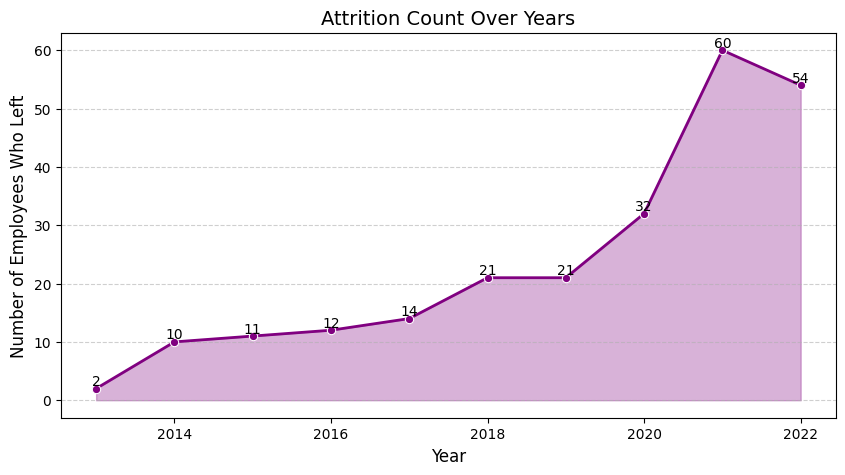

In [43]:
# Extract year from HireDate
HR_Employee['Attrition/CurrentYear'] = HR_Employee['Attrition/CurrentDate'].dt.year

# Filter only employees who left (Attrition = 'Yes')
df_attrition = HR_Employee[HR_Employee['Attrition'] == 'Yes']

# Count attrition per year
attrition_count = df_attrition.groupby('Attrition/CurrentYear').size().reset_index(name='AttritionCount')

# Plot the attrition trend over years
plt.figure(figsize=(10, 5))
sns.lineplot(x=attrition_count['Attrition/CurrentYear'], y=attrition_count['AttritionCount'], marker='o', color='purple', linewidth=2)

# Fill area below the curve
plt.fill_between(attrition_count['Attrition/CurrentYear'], attrition_count['AttritionCount'], alpha=0.3, color='purple')

# Add labels
for x, y in zip(attrition_count['Attrition/CurrentYear'], attrition_count['AttritionCount']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title('Attrition Count Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Employees Who Left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()

# Performance DashBoard:

# Performance Correlation :

OverTime , Salary , JobSatisfaction , EnvironmentSatisfaction , WorkLifeBalance are Eak Negative Relation with ManagerRating
SelfRating is Strong Positive Relation with ManagerRating
RelationshipSatisfaction , TrainingOpportunitiesTaken are Weak Positive Relation with ManagerRating

In [58]:
# Select relevant columns for correlation analysis
columns_of_interest = ['ManagerRating', 'WorkLifeBalance', 'SelfRating', 
                       'EnvironmentSatisfaction', 'JobSatisfaction', 
                       'RelationshipSatisfaction', 'TrainingOpportunitiesTaken','Salary','OverTime','Attrition']

# Calculate the correlation matrix
correlation_matrix = HR_Data[columns_of_interest].corr()
correlation_matrix


,ManagerRating,WorkLifeBalance,SelfRating,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesTaken,Salary,OverTime
ManagerRating,1.000000,-0.004092,0.851888,-0.006449,-0.013415,0.017715,0.005845,-0.007987,-0.015600
WorkLifeBalance,-0.004092,1.000000,0.006320,0.098539,0.049810,0.062818,0.005776,-0.004019,-0.001364
SelfRating,0.851888,0.006320,1.000000,-0.006408,-0.009865,0.020602,0.007936,-0.015496,-0.005649
EnvironmentSatisfaction,-0.006449,0.098539,-0.006408,1.000000,0.107720,0.108563,-0.019216,-0.012903,-0.008782
JobSatisfaction,-0.013415,0.049810,-0.009865,0.107720,1.000000,0.059435,-0.000684,0.019146,0.020096
RelationshipSatisfaction,0.017715,0.062818,0.020602,0.108563,0.059435,1.000000,-0.018017,0.006771,0.025656
TrainingOpportunitiesTaken,0.005845,0.005776,0.007936,-0.019216,-0.000684,-0.018017,1.000000,0.015312,0.002504
Salary,-0.007987,-0.004019,-0.015496,-0.012903,0.019146,0.006771,0.015312,1.000000,0.034241
OverTime,-0.015600,-0.001364,-0.005649,-0.008782,0.020096,0.025656,0.002504,0.034241,1.000000


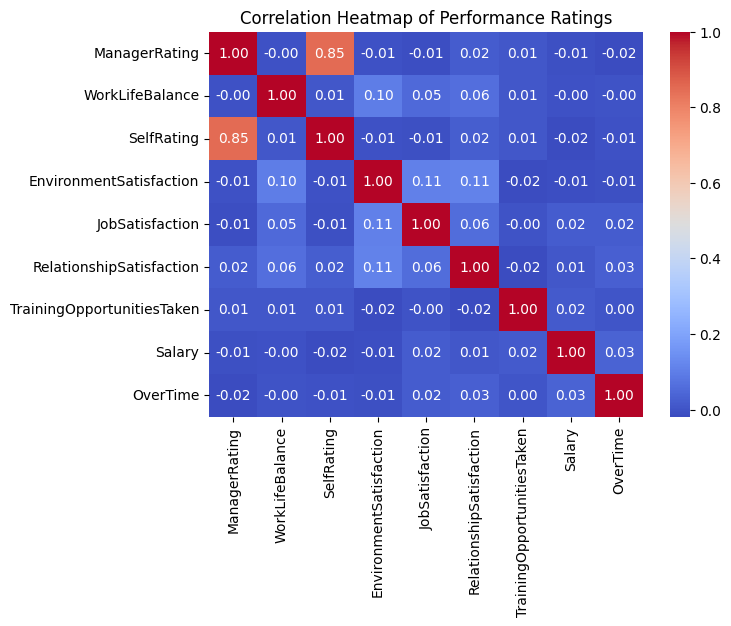

In [59]:
# Plot the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Performance Ratings')
plt.show()

# Training Percentage Per JobRole:
 **Recruiter** is highest percentage of Taken Training due for their Opportunities : **66%**

In [68]:
# Calculate total training opportunities taken for each job role
training_taken = HR_Data.groupby('JobRole')['TrainingOpportunitiesTaken'].sum()

# Calculate total available training opportunities within the year per job role
training_within_year = HR_Data.groupby('JobRole')['TrainingOpportunitiesWithinYear'].sum()

# Compute the percentage of training taken relative to the total available training opportunities within the year
training_percentage = (training_taken / training_within_year) * 100

# Convert to DataFrame for visualization
training_percentage_df = training_percentage.reset_index()
training_percentage_df.columns = ['JobRole', 'TrainingPercentageRelativeToYear']
# Sort in descending order by TrainingPercentageRelativeToYear
training_percentage_df = training_percentage_df.sort_values(by='TrainingPercentageRelativeToYear', ascending=False)

# Display the result
print(training_percentage_df)


# Display the result
print(training_percentage_df)


                      JobRole  TrainingPercentageRelativeToYear
8                   Recruiter                         66.071429
11   Senior Software Engineer                         54.545455
2         Engineering Manager                         51.923077
9             Sales Executive                         51.103956
3         HR Business Partner                         50.980392
12          Software Engineer                         50.626305
7                     Manager                         50.194553
10       Sales Representative                         49.699399
1              Data Scientist                         49.180328
6   Machine Learning Engineer                         46.810700
0           Analytics Manager                         45.547074
4                HR Executive                         43.678161
5                  HR Manager                         28.571429
                      JobRole  TrainingPercentageRelativeToYear
8                   Recruiter           

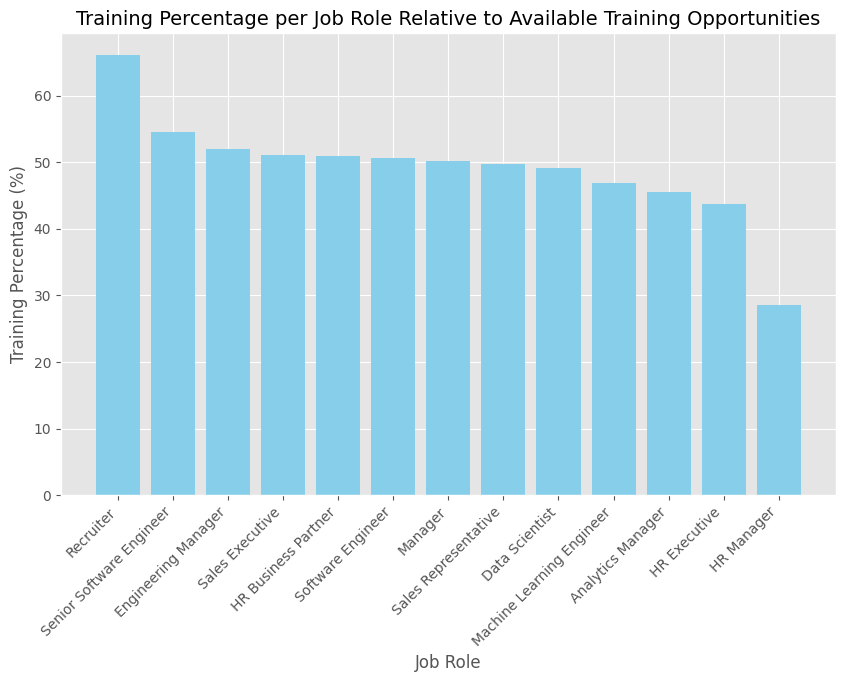

In [69]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(training_percentage_df['JobRole'], training_percentage_df['TrainingPercentageRelativeToYear'], color='skyblue')

# Add labels and title
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Training Percentage (%)", fontsize=12)
plt.title("Training Percentage per Job Role Relative to Available Training Opportunities", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate job role labels for better readability

# Show the plot
plt.show()


# Performance Per JobRole (Weighted Average Approach)
>**Recruiter** is the highest Average rating over years : **3.6**

In [54]:

# Get the minimum review year per job role
min_review_year = HR_Data.groupby("JobRole")["ReviewYear"].transform("min")

# Calculate the weight (difference from min year + 1)
HR_Data["Weight"] = (HR_Data["ReviewYear"] - min_review_year) + 1

# Calculate the weighted sum of Manager Rating
HR_Data["WeightedRating"] = HR_Data["ManagerRating"] * HR_Data["Weight"]

# Compute the weighted average per job role
weighted_avg = HR_Data.groupby("JobRole").apply(
    lambda x: x["WeightedRating"].sum() / x["Weight"].sum()
).reset_index(name="WeightedAvgManagerRating").sort_values(by="WeightedAvgManagerRating", ascending=False) 

# Display results
print(weighted_avg)


                      JobRole  WeightedAvgManagerRating
8                   Recruiter                  3.608456
1              Data Scientist                  3.540212
6   Machine Learning Engineer                  3.505780
12          Software Engineer                  3.495622
4                HR Executive                  3.482759
10       Sales Representative                  3.469287
2         Engineering Manager                  3.439168
5                  HR Manager                  3.439024
0           Analytics Manager                  3.435065
9             Sales Executive                  3.432565
7                     Manager                  3.411317
11   Senior Software Engineer                  3.409156
3         HR Business Partner                  3.147651


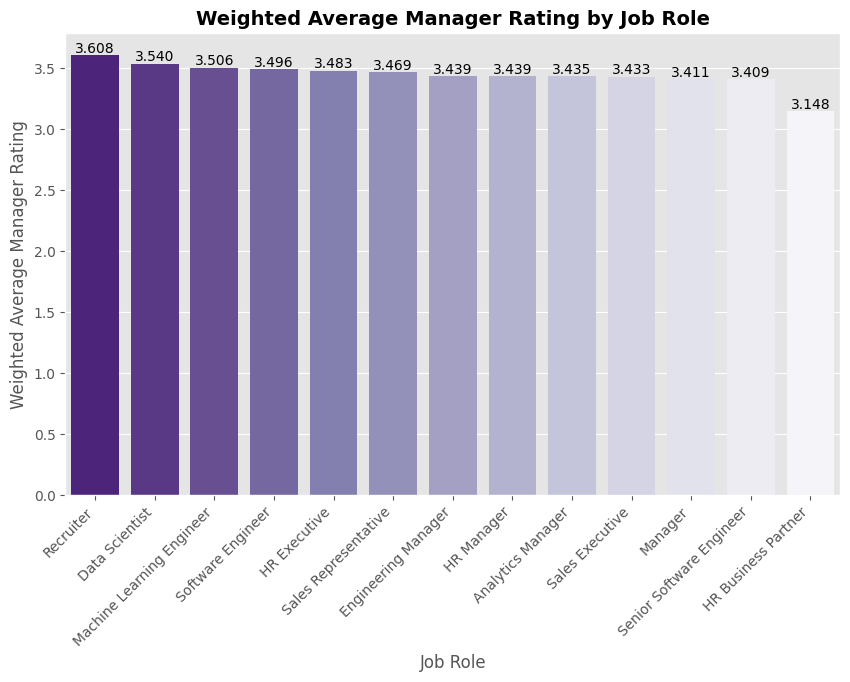

In [88]:

# Set plot style
plt.style.use('ggplot')

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Sort data to ensure highest rating is on the left
weighted_avg = weighted_avg.sort_values('WeightedAvgManagerRating', ascending=False)

# Define a purple gradient palette with darker colors for higher values
colors = sns.color_palette("Purples_r", len(weighted_avg))  # Reverse the palette to make highest darker

# Create the bar plot (vertical column bar)
sns.barplot(
    data=weighted_avg, 
    x='JobRole', 
    y='WeightedAvgManagerRating', 
    palette=colors
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Weighted Average Manager Rating', fontsize=12)
plt.title('Weighted Average Manager Rating by Job Role', fontsize=14, fontweight='bold')

# Show values on bars
for index, value in enumerate(weighted_avg['WeightedAvgManagerRating']):
    plt.text(index, value + 0.02, f'{value:.3f}', ha='center', fontsize=10)

# Show the plot
plt.show()

# Performance Per JobRole (Proportion for each rate ceteogory )
 **Recruiter**  is Highest percentage for thos who took "Above and Beyond  >>>> **20.5 %**

In [61]:
manager_rating_by_jobrole = (
    HR_Data.groupby(['JobRole', 'ManagerRatingLevel']).size()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1) * 100 
)

print(manager_rating_by_jobrole)


ManagerRatingLevel         Above and Beyond  Exceeds Expectation   \
JobRole                                                             
Analytics Manager                 13.903743             34.759358   
Data Scientist                    18.640351             30.701754   
Engineering Manager               14.285714             36.428571   
HR Business Partner                8.695652             30.434783   
HR Executive                      16.470588             36.470588   
HR Manager                        18.750000             31.250000   
Machine Learning Engineer         16.268980             33.405640   
Manager                           15.200000             29.600000   
Recruiter                         20.481928             31.325301   
Sales Executive                   15.794224             32.942238   
Sales Representative              13.524590             32.786885   
Senior Software Engineer          12.771084             35.180723   
Software Engineer                 

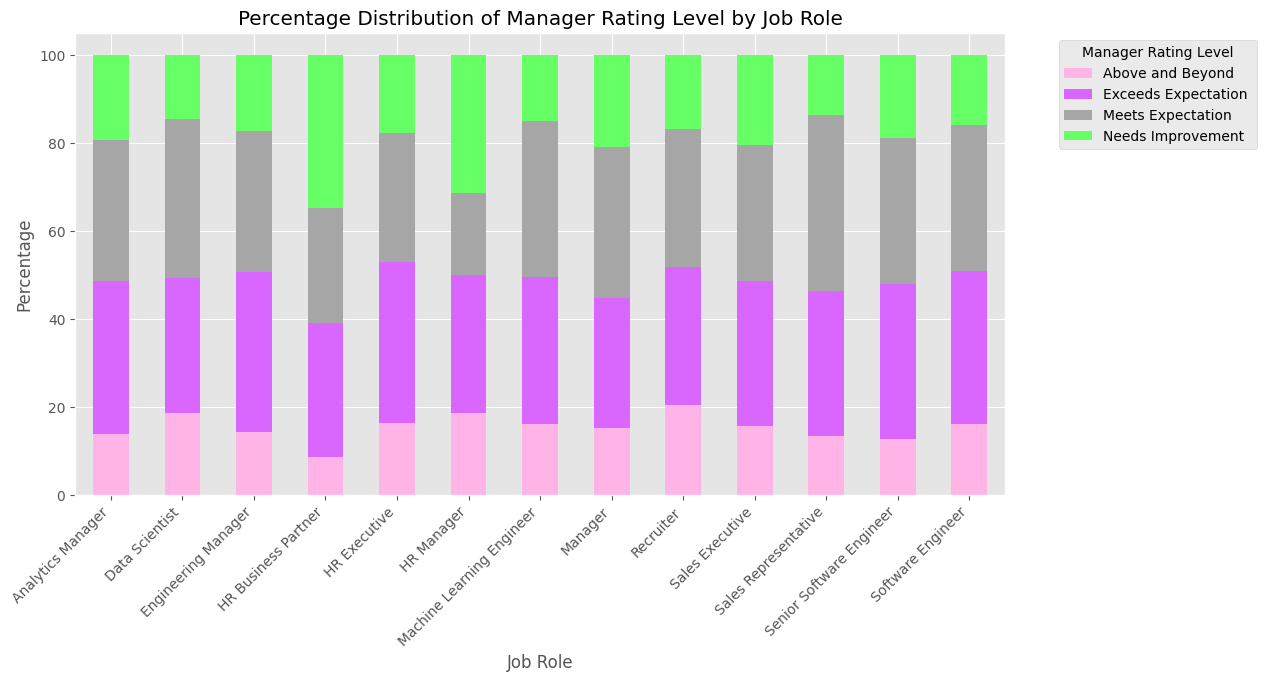

In [92]:
# Define pink, purple, gray, and green shades
custom_colors = ['#ffb3e6', '#d966ff', '#a6a6a6', '#66ff66', '#339933']

# Plot stacked bar chart with the new color scheme
ax = manager_rating_by_jobrole.plot(kind='bar', stacked=True, color=custom_colors, figsize=(12,6))

plt.title('Percentage Distribution of Manager Rating Level by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.legend(title='Manager Rating Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-axis labels
plt.xticks(ticks=range(len(manager_rating_by_jobrole.index)), labels=manager_rating_by_jobrole.index, rotation=45, ha='right')

plt.show()


# Historical Performance:
>Some periods show higher ratings, while others drop, suggesting inconsistencies in employee performance.
# Possible Reasons for High Attrition Of High Performance JobRole (Rcruiters) ,EduvcationLevel(No Formal Qualifications):

>High workloads (Overtime)
& Economic conditions as Low Salaries For High Performance Employee that impacts Their performance

# Training Per EducationLevel

In [99]:
# Calculate total training opportunities taken for each education field
training_taken_Level = HR_Data.groupby('EducationLevel')['TrainingOpportunitiesTaken'].sum()

# Calculate total available training opportunities within the year per education field
training_withinYear_Level = HR_Data.groupby('EducationLevel')['TrainingOpportunitiesWithinYear'].sum()

# Compute the percentage of training taken relative to the total available training opportunities within the year
training_percentage_Level = (training_taken_Level / training_withinYear_Level).fillna(0) * 100

# Convert to DataFrame for visualization
training_percentage_Pivot = training_percentage_Level.reset_index()
training_percentage_Pivot.columns = ['EducationLevel', 'TrainingPercentageRelativeToYear']

# Display the result
print(training_percentage_Pivot)


             EducationLevel  TrainingPercentageRelativeToYear
0                Bachelors                          51.050420
1                 Doctorate                         49.859155
2              High School                          47.875895
3                  Masters                          49.898250
4  No Formal Qualifications                         53.184165


# Plotting Training Per EducationLevel:

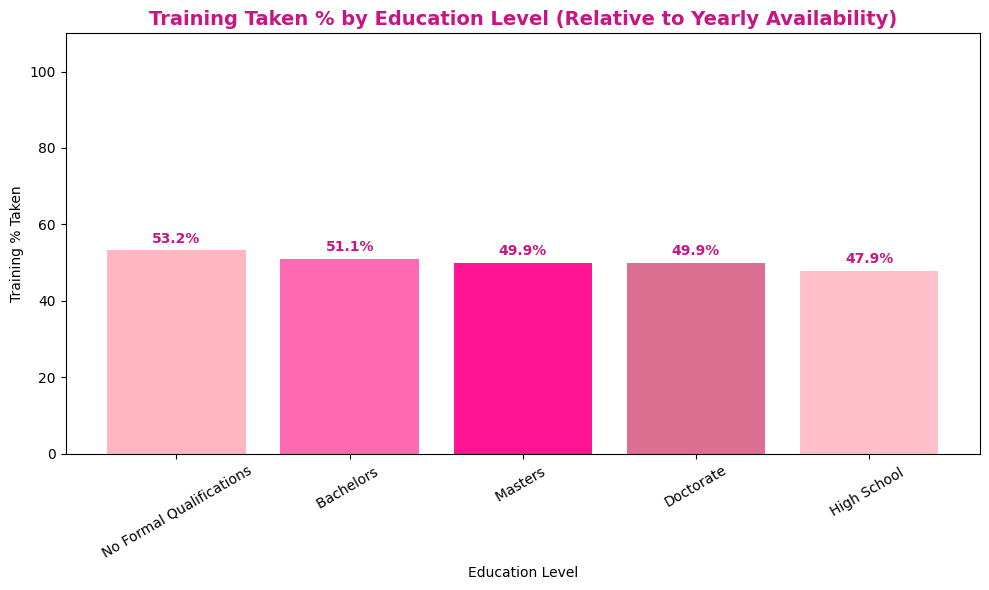

In [43]:

pink_palette = ['#ffb6c1', '#ff69b4', '#ff1493', '#db7093', '#ffc0cb']
training_percentage_Pivot = training_percentage_Pivot.sort_values(by='TrainingPercentageRelativeToYear', ascending=False).reset_index(drop=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    training_percentage_Pivot['EducationLevel'],
    training_percentage_Pivot['TrainingPercentageRelativeToYear'],
    color=pink_palette
)

labels = training_percentage_Pivot['TrainingPercentageRelativeToYear'].round(1).astype(str) + '%'
x_positions = range(len(labels))
y_positions = training_percentage_Pivot['TrainingPercentageRelativeToYear'] + 2  # a bit above bars

[ax.text(x, y, label, ha='center', color='#c71585', weight='bold') for x, y, label in zip(x_positions, y_positions, labels)]

# Style the chart
ax.set_title('Training Taken % by Education Level (Relative to Yearly Availability)', fontsize=14, weight='bold', color='#c71585')
ax.set_ylabel('Training % Taken')
ax.set_xlabel('Education Level')
ax.set_ylim(0, 110)  # give extra space for label
ax.set_xticks(x_positions)
ax.set_xticklabels(training_percentage_Pivot['EducationLevel'], rotation=30)

plt.tight_layout()
plt.show()



# Performance Per JobRole (Weighted Average Approach)
>**No Formal Qualification** is the highest Average rating over years : ** **

In [ ]:

# Get the minimum review year per job role
min_review_year2 = HR_Data.groupby("EducationLevel")["ReviewYear"].transform("min")

# Calculate the weight (difference from min year + 1)
HR_Data["Weight2"] = (HR_Data["ReviewYear"] - min_review_year2) + 1

# Calculate the weighted sum of Manager Rating
HR_Data["WeightedRating2"] = HR_Data["ManagerRating"] * HR_Data["Weight2"]

# Compute the weighted average per Education Level
weighted_avg2 = HR_Data.groupby("EducationLevel").apply(
    lambda x: x["WeightedRating2"].sum() / x["Weight2"].sum()
).reset_index(name="WeightedAvgManagerRating2").sort_values(by="WeightedAvgManagerRating2", ascending=False) 

# Display results
print(weighted_avg2)


# Performance Per EducationLevel(Proportion for each rate ceteogory)
**No Formal Qualifications** is Highest percentage for thos who took "Above and Beyond "     >>>> **19%**


In [72]:
educationlevel_manager_rating_level = (
    HR_Data.groupby(['EducationLevel', 'ManagerRatingLevel']).size()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1) * 100  # Convert to percentage
)

print(educationlevel_manager_rating_level)


ManagerRatingLevel        Above and Beyond  Exceeds Expectation   \
EducationLevel                                                     
Bachelors                        15.230037             34.743522   
Doctorate                        17.514124             32.768362   
High School                      14.782609             34.492754   
Masters                          16.333333             31.166667   
No Formal Qualifications         19.047619             31.122449   

ManagerRatingLevel        Meets Expectation  Needs Improvement  
EducationLevel                                                  
Bachelors                         33.844527          16.181914  
Doctorate                         29.943503          19.774011  
High School                       32.270531          18.454106  
Masters                           35.000000          17.500000  
No Formal Qualifications          32.823129          17.006803  


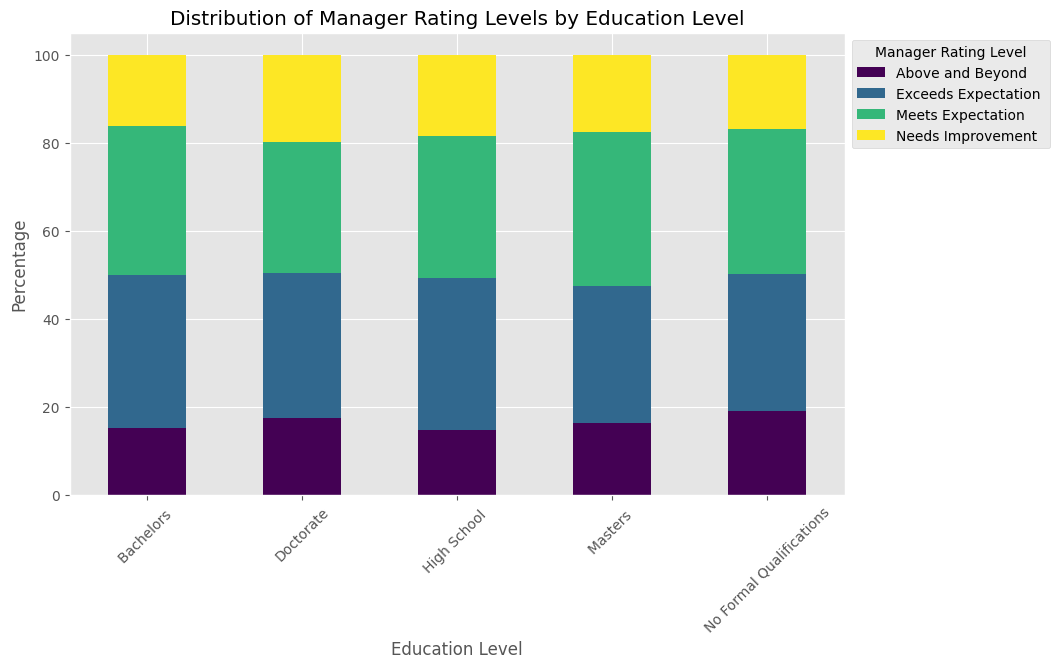

In [73]:
import matplotlib.pyplot as plt

# Plot stacked bar chart
educationlevel_manager_rating_level.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Labels and title
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Distribution of Manager Rating Levels by Education Level')
plt.legend(title='Manager Rating Level', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()
#Results: Employees with a Doctorate have the highest percentage in the Needs Improvement category (19.77%) but also a higher percentage in Above and Beyond (17.51%).
#Employees with No Formal Education have a high percentage in Above and Beyond (19.05%), suggesting that experience or skill-based learning plays a crucial role in performance.


# Top5 Employees Based ON Their Average Rating (5.0)

In [116]:
import pandas as pd

# Assuming HR_Data is already loaded

# Step 1: Calculate the average ManagerRating per EmployeeID
AvgRating = HR_Data.groupby("EmployeeID", as_index=False).agg({
    "ManagerRating": "mean",  # Average Manager Rating
    "EmployeeID": "first",   # Keep Employee Name for identification
    "Department" : "first",
    "JobRole" : "first"
})

# Step 2: Rank employees per Department and get the top 10
Top_employees = AvgRating.nlargest(5, "ManagerRating")

Top_employees


,ManagerRating,EmployeeID,Department,JobRole
21,5.0,0592-D909,Technology,Analytics Manager
65,5.0,0D8F-C0F3,Technology,Data Scientist
71,5.0,0F2B-3457,Sales,Sales Executive
77,5.0,1053-41B1,Technology,Data Scientist
190,5.0,2926-D386,Technology,Machine Learning Engineer


# Historical Average Mnager Rating:

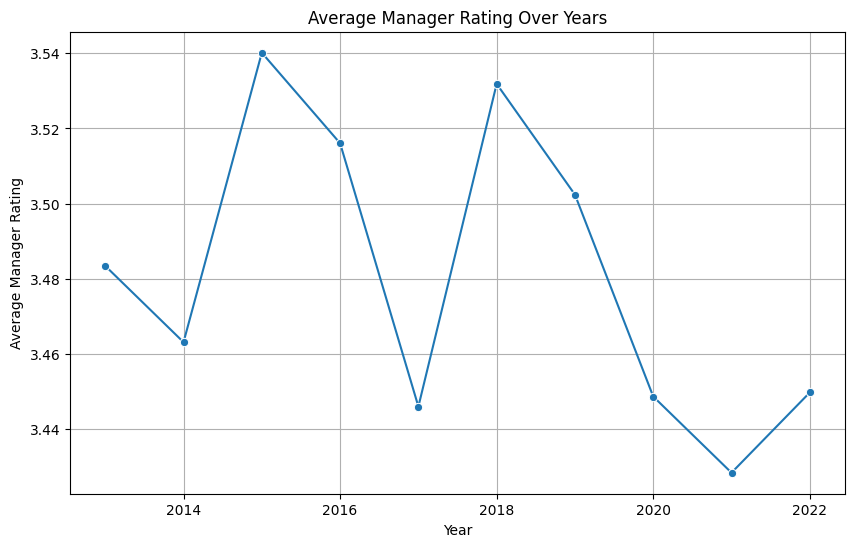

In [73]:
# ManagerRating over years due to ReviewDate:

# Extract year from 'ReviewDate'

HR_Performance.loc[:, 'ReviewYear'] = HR_Performance['ReviewDate'].dt.year

# Group by year and calculate the average ManagerRating
average_manager_rating_by_year = HR_Performance.groupby('ReviewYear')['ManagerRating'].mean().reset_index()

# Plot the average ManagerRating over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_manager_rating_by_year, x='ReviewYear', y='ManagerRating', marker='o')
plt.title('Average Manager Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.grid(True)
plt.show()

# Prediction With Scikit-Learn Library And Linear Regression Model :

# Predict Attrition Rate For 5 Years
>The attrition rate is expected to rise steadily over the next five years.
This suggests that if no action is taken, employee turnover will continue to increase, potentially affecting company stability and performance.
# Possible Reasons for High Attrition :
>Salary & Benefits Issues – If salaries do not match market trends, employees may seek better opportunities. & 
Workload Stress – Employees may leave due to burnout or high job demands. & 
Especialyy those who have highest raing of (Above And Beyond) Highest Overtime but Lowest Salaries &  
Lack of Training & Development – If employees do not see career progression, they might leave for better opportunities. 

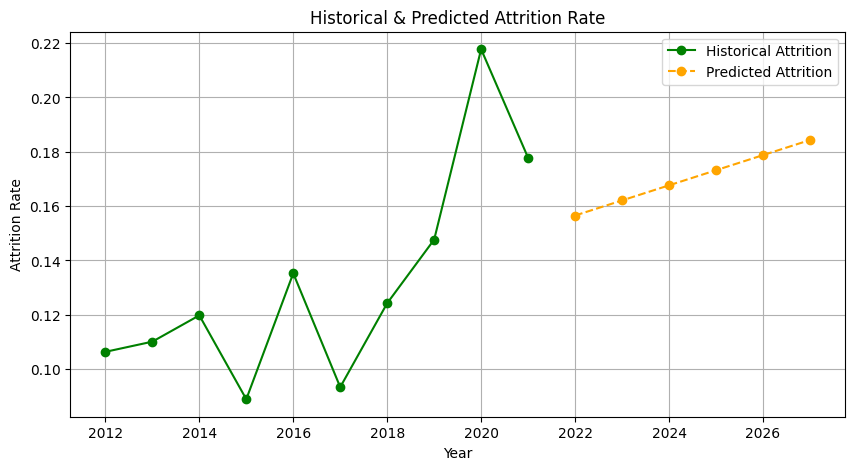

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and clean data
Filtered_Attrition = HR_Data.dropna().copy()

# Convert HireDate to datetime
Filtered_Attrition['HireDate'] = pd.to_datetime(Filtered_Attrition['HireDate'], errors='coerce')

# Ensure relevant columns exist and drop any newly created NaN values
Filtered_Attrition = Filtered_Attrition[['HireDate', 'Attrition']].dropna()

# Extract year from HireDate
Filtered_Attrition['Year'] = Filtered_Attrition['HireDate'].dt.year

# Calculate historical attrition rate
historical_attrition = Filtered_Attrition.groupby('Year')['Attrition'].mean()

# Prepare future predictions (2022-2027) using a simple linear model
X = Filtered_Attrition[['Year']]
y_attrition = Filtered_Attrition['Attrition']

# Train the model
attrition_model = LinearRegression()
attrition_model.fit(X, y_attrition)

# Predict attrition rate for the years 2022 to 2027
future_years = pd.DataFrame({'Year': range(2022, 2028)})  
predicted_attrition = attrition_model.predict(future_years)

# Plot both historical and predicted attrition in one chart
plt.figure(figsize=(10, 5))

# Plot historical attrition
plt.plot(historical_attrition.index, historical_attrition.values, marker='o', color='g', label='Historical Attrition')

# Plot predicted attrition
plt.plot(future_years['Year'], predicted_attrition, marker='o', linestyle='dashed', color='orange', label='Predicted Attrition')

# Formatting
plt.title('Historical & Predicted Attrition Rate')
plt.xlabel('Year')
plt.ylabel('Attrition Rate')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Predict Performance For 5 Years:
>The forecasted trend (dashed orange line) shows a continuous decline in ratings over the next seven years.
If this trend continues, it could indicate decreasing employee satisfaction and growing performance concerns.
# Recommendations (How to Improve Manager Ratings & Performance)
> Leadership Training – Invest in programs to improve managerial decision-making, communication, and leadership skills & 
> Implrove Employees Trainig - If managers are not improving their skills, employee performance will suffer & 
> Employee Feedback Loops – Conduct surveys and meetings to understand why employees rate managers poorly.& 
> Better Work-Life Balance – Reduce excessive workloads and ensure employees have realistic performance expectations. &
> Enhance Performance Reviews – Standardize performance evaluation criteria to ensure fairness and transparency.&
Instead of managers using different personal judgments to evaluate employees, a structured approach ensures everyone is assessed equally based on the same key factors.

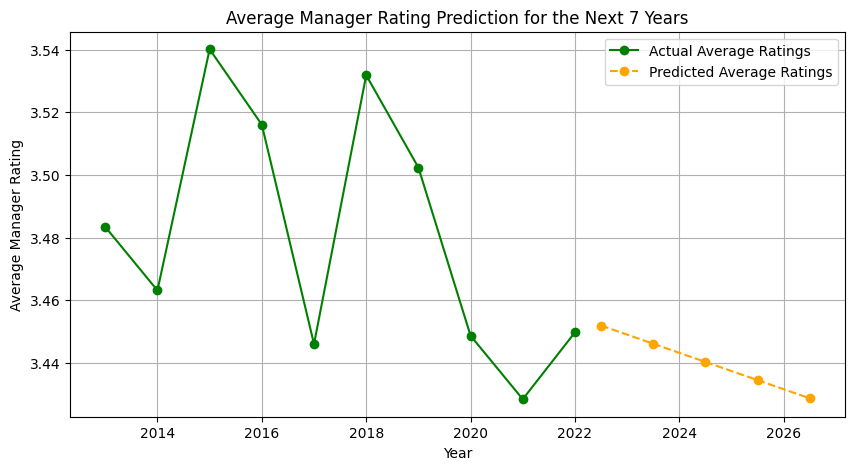

In [78]:

import datetime
# Extract year from ReviewDate
HR_Performance.loc[:, 'ReviewYear'] = HR_Performance['ReviewDate'].dt.year

# Calculate average ManagerRating per year
average_ratings_per_year = HR_Performance.groupby('ReviewYear')['ManagerRating'].mean()

# Prepare data for modeling
X_ratings = average_ratings_per_year.index.values.reshape(-1, 1)  # Years
y_ratings = average_ratings_per_year.values  # Average ratings

# Fit a linear regression model
model_ratings = LinearRegression()
model_ratings.fit(X_ratings, y_ratings)

# Predict average ratings for the next 7 years
future_years_ratings = np.array([(datetime.datetime.now().year)-3.5 + i for i in range(1,6)]).reshape(-1, 1)
predicted_ratings = model_ratings.predict(future_years_ratings)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X_ratings, y_ratings, marker='o', color='green', label='Actual Average Ratings')
plt.plot(future_years_ratings, predicted_ratings, marker='o', color='orange', linestyle='--', label='Predicted Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.title('Average Manager Rating Prediction for the Next 7 Years')
plt.legend()
plt.grid(True)
plt.show()

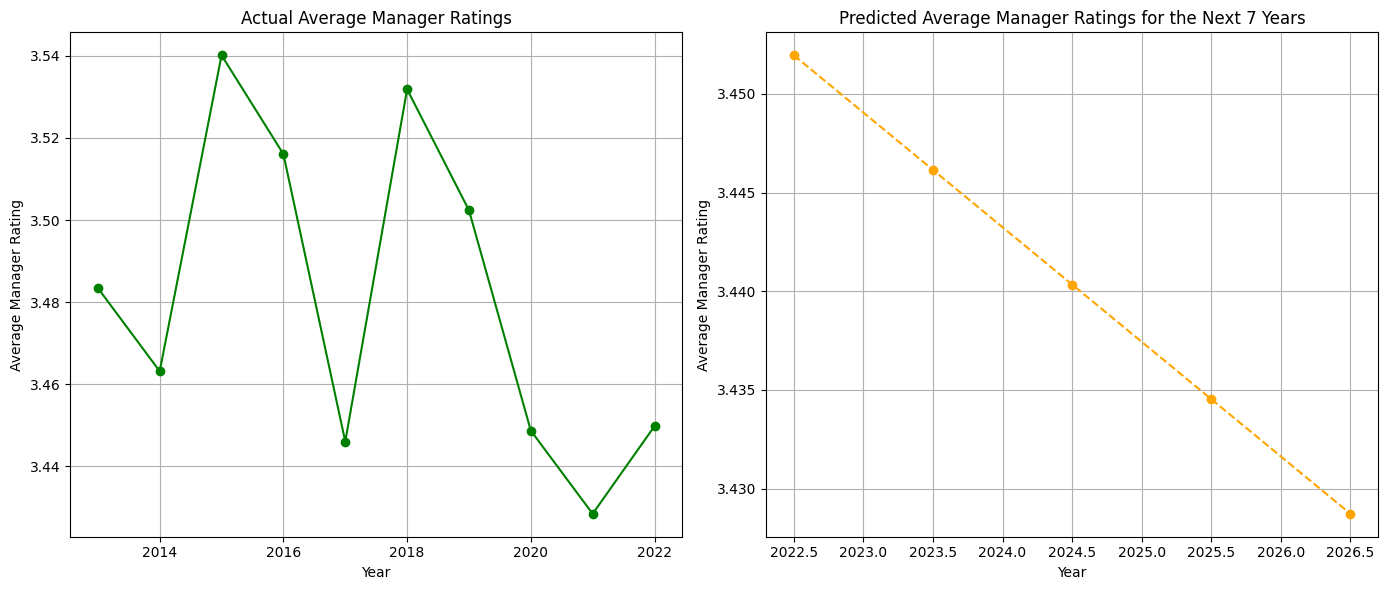

In [80]:
# Plot the results in two separate charts
plt.figure(figsize=(14, 6))

# Actual average ratings line plot
plt.subplot(1, 2, 1)
plt.plot(X_ratings, y_ratings, marker='o', color='green', label='Actual Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.title('Actual Average Manager Ratings')
plt.grid(True)

# Predicted average ratings line plot
plt.subplot(1, 2, 2)
plt.plot(future_years_ratings, predicted_ratings, marker='o', color='orange', linestyle='--', label='Predicted Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Manager Rating')
plt.title('Predicted Average Manager Ratings for the Next 7 Years')
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict Salary For 5 Years:

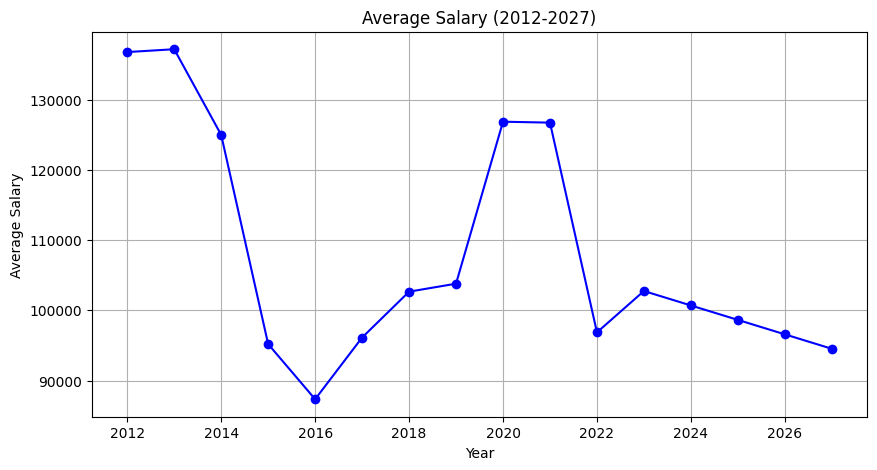

In [79]:

# Filter data for relevant columns
Relevant_Columns = ['HireDate', 'Salary']
Filtered_Salary = HR_Employee[Relevant_Columns].copy()

# Extract year from HireDate
Filtered_Salary['Year'] = Filtered_Salary['HireDate'].dt.year

# Calculate historical average salary
historical_salary = Filtered_Salary.groupby('Year')['Salary'].mean()

# Prepare future predictions (2022-2027) using a simple linear model
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
X = Filtered_Salary[['Year']]
y_salary = Filtered_Salary['Salary']

# Initialize and train the model
salary_model = LinearRegression()
salary_model.fit(X, y_salary)

# Predict average salary for the years 2022 to 2027
future_years = pd.DataFrame({'Year': range(2022, 2028)})  
predicted_salary = salary_model.predict(future_years)

# Combine historical and predicted data
all_years = np.arange(historical_salary.index.min(), 2028)
combined_salary = np.concatenate((historical_salary.values, predicted_salary))[:len(all_years)]

# Plot the average salary from 2012 to 2027
plt.figure(figsize=(10, 5))
plt.plot(all_years, combined_salary, marker='o', color='b')
plt.title('Average Salary (2012-2027)')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

# End Of Project 